# <span align="center">Quantifying The World Case Study Unit 14 - Final Project</span>
### <span align="right">Ryan Bass and Brett Benefield </span>
### <span align="right">April 19, 2019</span>

# Introduction

All companies must make predictions in order to guide their business decisions to become more profitable. With the field of data science growing this has started to become a major role for data scientists. Therefore, being able to take what data is avaialbe and turn it into accurate models has become a strongly sought after skillset. However, without domain knowledge a data scientist has to treat the data as anonymized and limits the amount of intuition and expertise that can be applied to the data preparation steps if a subject matter expert (SME) was present. Instead variables have to be treated as completely independent until found otherwise using exploratory data analysis.

Here we will be preparing a uncharacterized dataset for a binary classification model. Before doing so we must take into account any context a stakeholder can share to guide our decision process in building the model. Important information might include a data dictionary, explaining what variables mean so the problem can be more well thought out. Also what is more costly in a prediction model, predicting a positive instance when it is actually negative (false positive) or vice versa (false negative)? Also knowing if there is a pattern known to the stakeholder of when values are missing so knowledgable imputation of the missing data can take place rather than using common means to impute the data. These questions and many more should be asked of stakeholders to help guide a more robust and accurate prediction model.


# Methods

### Metric Choice
When we have to select the best model we must first decide which metric best interprets our goal of the model. It is 100 times more costly to predict false positives than it is false negatives, therefore we must choose a metric that penalizes false positives much more. The four most common metrics for judging models are accuracy, precision, recall, and f1 score.

Accuracy is just the ratio of correctly predicted observations (ex. 9 out of 10 correctly predicted is 90% accurate) and is useful for evenly distributed response variables as well as the false positives and false negatives being equally the same cost as determined by the user. Since our response variable is not evenly distributed nor is the cost of false positives and false negatives equal, we will not be using accuracy as our performance metric.

Recall (or sensitivity) is calculated as: $$Recall = True Positives / (True Positives + False Negatives)$$ The denominator of the ratio is the entire count of positive instances in the dataset, so it is a ratio of only the correctly predicted positive instances. Because we're only looking at positive instances, uneven distrubtion of our response variable would not be an issue. Recall does not penalize false positives, therefore we will not be using recall.

Precision is calculated as: $$Precision = True Positives / (True Positives + False Positives)$$ The denominator here the count of all positives your model predicted (regardless if they are true or not), so it will penalize a model that overly predicts positive results. This fits our thought process of false positives being more costly to the business. Like with recall, an uneven distrbution of our response variable would not be an issue.

F1 score is calculated as: $$F1 = 2*(Recall * Precision)/(Recall + Precision)$$ It is a weighted average of both precision and recall. Because of this it weighs false positives and false negatives equally. It is most appropriate as a better metric than accuracy, especially when response variables are unevenly distributed. Since we believe false positives are more costly in our model, we will not use F1 score.

Since precision penalizes false positives the most we will be using precision to judge how well our model is performing in the most cost effective fashion.

## Data Cleaning
### Converting Strings to Numbers
When a column contains non-numeric characters it will most likely be treated as a column of strings. Column 'x32' contains a '$\%$' character and column 'x37' contains a '$\$$' and ',' character. We must remove these characters and convert to the appropriate data type, float, to utilize most machine learning algorithms. We will remove these characters from each column and convert over to float values.

### Testing for repeated columns and data leaks
With anonymized data we must check to see if there are explanatory variables that are repeated, along with any that are too strongly correlated with the response variable. Having a column strongly correlated to the response variable can indicate a data leak. Data leaks can be thought of as information that is known after the fact when event y occurs, causing you to know whether y was 0 or 1 by looking at the column that is the data leak. This would bias our models strongly toward this column when this in fact does not help us predict future instances. We will generate a correlation matrix and look for very high Pearson's correlation coefficients (r) between all columns, and especially our response variable.

In [60]:
# Credit: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# Correlation Plot
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Table 1 - Correlation matrix of all original columns.

Looking through all of the correlation values we find that the pairs of x2 and x6, and x38 and x41 are perfectly correlated with a r of 1. One of each of these pairs can be removed since they are identical. There are no data leaks found however using correlation.

### One Hot Encoding
Categorical variables also need to be converted to numerical values in order to be used in machine learning algorithms. To do this we have to utilize a technique called one hot encoding. For example, if a variable has the 12 months of the year we can one hot encode them so now we have 12 different variable columns. So the new column, say isJanuary, originally had a January as its value it would now be a 1 in isJanurary and a 0 in all the other 11 variable columns. We found three column variables (x24, x29, x30) that need to be one hot encoded and will result in 18 more columns.

### Missing Data
In order to deal with missing data, it is important to understand how the data is missing.
There are three categories of missing data:
- Missing Completely at Random (MCAR)
- Missing at Random (MAR)
- Missing not at Random (MNAR)

#### Missing Completely at Random
In this category, there appears to be no discernable pattern to the missing data. From a statistical point of view, it is as equally likely that the data is recorded as it is missing.

#### Missing at Random
In this category, it appears that the data is missing to a specific subset of data; however, within that subset, it is as equally likely that the data is recorded as it is missing.

#### Missing Not at Random
In this category, there is a discernable pattern to the missing data.

### Imputation
Once it is determined how the data is missing, one or more methods below can be employed.
There are four common ways to impute missing data:
- Listwise Deletion
- Pairwise Deletion
- Single Imputation
- Hot Deck

#### Listwise Deletion
The listwise deletion method drops any row that has any missing data. This method should almost never be used. While removing the row removes the issue of missing data, it also deletes valuable data that can be used for other analysis. Data should be treated as sacred.

#### Pairwise Deletion
The pairwise method involves omitting a row of data if a value is missing in a given column(s), but keeping that row for analysis on other columns. This option is better than listwise deletion but care must be used if the percentage of missing values in the different columns are significantly different.

#### Single Imputation
The single imputation method tries to leverage patterns within the data to impute a likely value. Using this method, other columns of data are considered. If the non-missing values in a column follow a trend based on another column then that other column can be used to impute a value for the remaining missing values.

#### Hot Deck
The hot deck method takes single imputation a step further. This method again looks for patterns or trends in other columns to help impute the missing values. However, a better guess might be dependent on a subset of another column(s) of data. In this case, instead of using a general trend across a column, we subset the data and determine sub-trend between the columns.

### Recursive Feature Elimination
After One Hot Encoding we have increased our explanatory variables from 49 to 67 variables. To determine the most important variables for classifying our response variable we can use Recursive Feature Elimination (RFE). Narrowing down what variables contribute most to our predictions can help decrease the speed of how fast our models predict allowing us to run several machine learning algorithms to help determine which is the best for our dataset. This another example in data science of the tradeoff of computational efficiency and maximum evaluation performance.

In RFE, features are ranked by the model’s coefficients, or feature importance values. The model recursively eliminates a small number of features per loop by attempts to eliminate dependencies and collinearity that may exist in the model. RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. To find the optimal number of features, cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.

Citation: http://www.scikit-yb.org/en/latest/api/features/rfecv.html

After RFE we have reduced our explanatory variables from 67 to 49. We will now subset our data with these more predictive explanatory variables to decrease our computational time for finding the optimal model.

## 80/20 Training Split (Reduced # of Features)

### Base model comparison
Now that our datasets have been cleaned and feature elimination is complete we now need to find the optimal machine learning algorithm for our subsetted dataset. To do so we will use the default parameters of several classification algorithms including; logistic regression, support vector machines, ada boost classifier, guassian naive bayes, and random forest. Whichever algorithm we find performs the best will then be optimized for our final model by hyperparameter tuning and utilizing the full dataset to try to find the maximum precision possible.

In [67]:
# Work with an 80/20 split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.20, random_state=42)

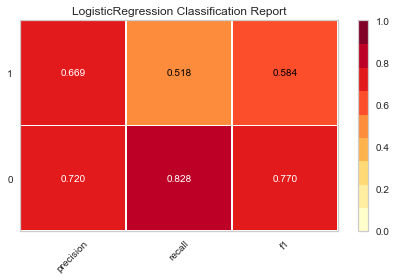

Confusion Matrix:
 [[15888  3292]
 [ 6175  6645]]


In [24]:
# Logistic Regression Model
clf = LogisticRegression(solver='lbfgs', random_state=42, n_jobs=-1)
analysisReport(clf, xTrain, yTrain, xTest, yTest)

Figure 1 - Logistic Regression Model Performance

C:\Users\Brett\Anaconda64\envs\gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


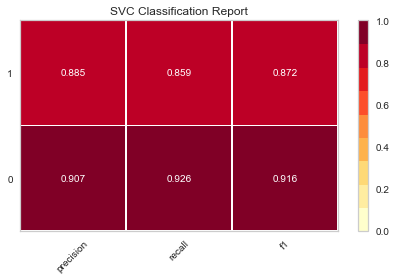

C:\Users\Brett\Anaconda64\envs\gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix:
 [[17756  1424]
 [ 1813 11007]]


In [25]:
# SVC Model
clf = SVC(random_state=42)
analysisReport(clf, xTrain, yTrain, xTest, yTest)

Figure 2 - SVC Model Performance

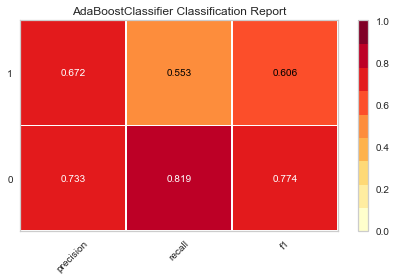

Confusion Matrix:
 [[15714  3466]
 [ 5734  7086]]


In [26]:
# AdaBoost Model
clf = AdaBoostClassifier(random_state=42)
analysisReport(clf, xTrain, yTrain, xTest, yTest)

Figure 3 - AdaBoostClassifier Model Performance

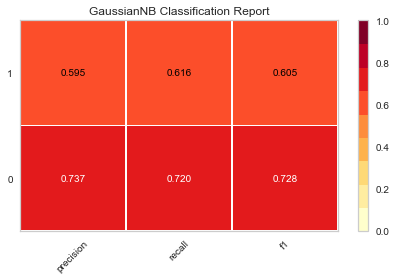

Confusion Matrix:
 [[13808  5372]
 [ 4924  7896]]


In [27]:
# Naive Bayes Model
clf = GaussianNB()
analysisReport(clf, xTrain, yTrain, xTest, yTest)

Figure 4 - Naive Bayes Model Performance

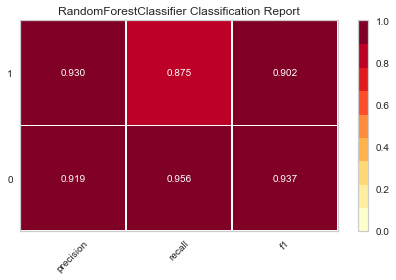

Confusion Matrix:
 [[18341   839]
 [ 1608 11212]]


In [28]:
# RandomForest Model
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
analysisReport(clf, xTrain, yTrain, xTest, yTest)

Figure 5 - RandomForest Model Performance

We found that Random Forest performed best with a 0.93 precision for predicting 1's and 0.919 for predicting 0's. The only other algorithm of note was Support Vector Machines with 0.885 and 0.907 precision for 1's and 0's respectively. Now that Random Forest is our machine learning algorithm of choice we'll move on to use all of our explanatory variables available rather than the previous RFE selected ones.

## 80/20 Split Training Data (All Features)

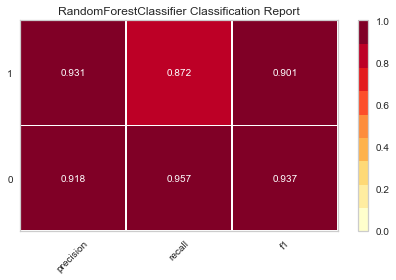

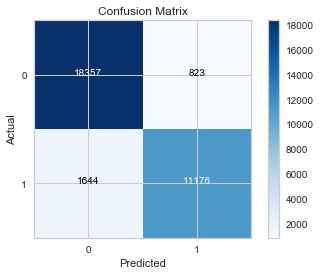

In [46]:
# Random Forest Model
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
analysisReport(clf, xTrain, yTrain, xTest, yTest)

Figure 6 - RandomForest Model Performance (All Features)

We found that our base model Random Forest decreased its precision by 0.007 and 0.008 predicting 1's and 0's respectively. We can see the counts of false positives and false negatives from our confusion matrix. The top left number is how many negative instances (0) were correctly called negative. The bottom right number is how many positive instances (1) were called positive. Both of these provide a value of $\$$ to the company. The top right is how many instances were actually negative but predicted positive, or false positives. These cost the company $\$1000$ per instance. Lastly, the bottom left is how many instances are actually positive but predicted as negative, or false negatives. These cose the company $\$10$. An accurate prediction nets our company $\$0$, so we are fighting to be as close to breaking even as possible. With our current baseline model we have 2,282 false posiives, and 4,502 false negatives. This means our current model will cost our company $\$2,607,520$. Now that we have our base level of how much our Random Forest model can cost us, we will now try to lower this as much as possible by tuning our hyperparameters.

### Tuning hyperparameters
Machine learning algorithms have many parameters that can be altered to increase the performance of your model. There are methods to tune them using GridSearchCV which will run a model on every combination of parameters you set but can be very slow in finding the best result. An alternative, RandomizedSearchCV, will not find the absolute optimal model but will find nearly as good of one in a fraction of the time. It does this by sampling a fixed number of parameters from a specified distribution rather than testing every single combination.

Credit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

### Yellowbrick Validation Curve Results
Below we use values obtained through its validation curve function

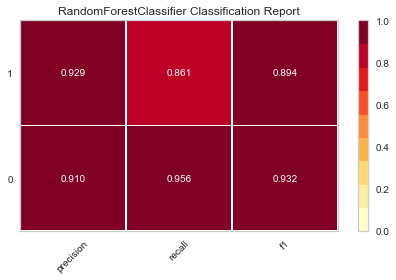

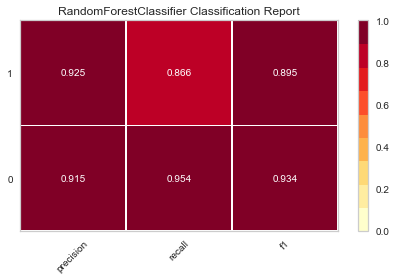

In [19]:
# Assess performance across all 2 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='entropy', max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=597, random_state=42, n_jobs=-1)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()

Figure 7 - Random Forest Model Performance

### Precision Metric

In [12]:
# Credit: https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Values over which to tune
param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(2, 30),
              "min_samples_split": sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 20),
              "criterion": ["gini", "entropy"]}

# Perform multiple iterations to find best match
n_iter_search = 30
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='precision')
clf.fit(xTrain, yTrain)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7877CB0F0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7877CB198>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7877CBEF0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7877CBCC0>, 'criterion': ['gini', 'entropy']},
      

In [13]:
# Result of randomized search
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 597} with a score of 0.93


In [47]:
# Rerun model so I can get confusion matrix data
clf = RandomForestClassifier(criterion='entropy', max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=597, random_state=42, n_jobs=-1)
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

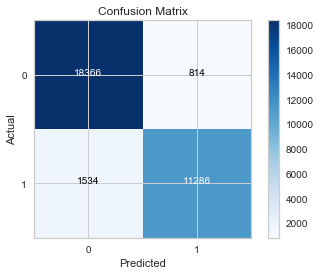

In [48]:
prettyCM(confusion_matrix(yTest, yhat), yTest)

### Affects of RandomizedSearch
In a previous instance, we obtained the following best parameters: 

The best parameters are {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 855} with a score of 0.92.

This is the risk of using a RandomizedSearch as you are not guaranteed an optimal result. We will be using the values we obtained from our previous RandomizedSearch for our models below.

Figure 8 - Confusion Matrix

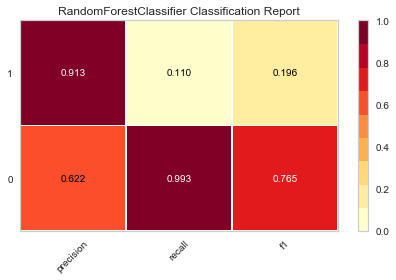

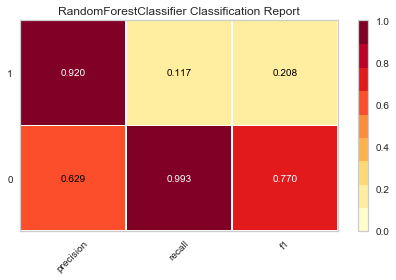

In [18]:
# Assess performance across all 2 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()

Figure 9 - Random Forest Performance

In [49]:
# Establish we want 10 fold x-validation
kSplits = KFold(n_splits = 10, random_state = 42)

# Work with a smaller subset of data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.20, random_state=42)

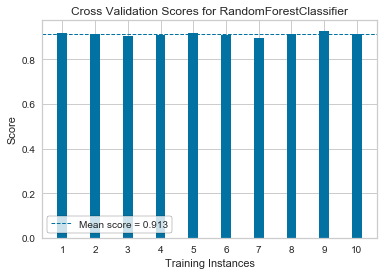

In [50]:
# Create a new figure and axes
_, ax = plt.subplots()

# Classifier
clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1)

cvScore = CVScores(
    clf, ax=ax, cv=kSplits, scoring='precision'
)

cvScore.fit(X, y)
cvScore.poof()

Figure 10 - 10 KFold Random Forest Model Performance

In [51]:
# Rerun to gain access to confusion matrix values
clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1)
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

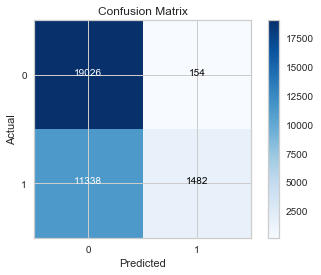

In [52]:
prettyCM(confusion_matrix(yTest, yhat), yTest)

Figure 11 - Confusion Matrix

### Affect of dropping highly correlated columns

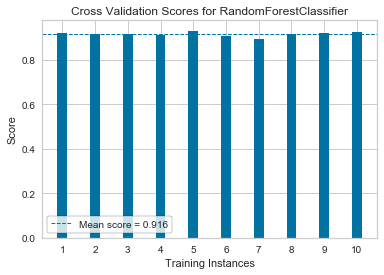

In [54]:
# Create a new figure and axes
_, ax = plt.subplots()

# Classifier
clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1)

cvScore = CVScores(
    clf, ax=ax, cv=kSplits, scoring='precision'
)

cvScore.fit(X, y)
cvScore.poof()

Figure 12 - 10 KFold Random Forest Performance (Correlated Columns Removed)

In [55]:
# Rerun to gain access to confusion matrix values
clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1)
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

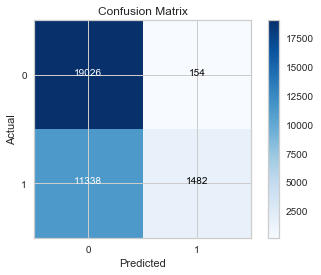

In [56]:
prettyCM(confusion_matrix(yTest, yhat), yTest)

Figure 13 - Confusion Matrix

# Results

Now that we have the best hyperparameters found by our range of values we input into our RandomizedSearchCV, we can run our full Random Forest model on it to find out how much better this model did to our baseline Random Forest model.

Now our false positives have dropped from 823 in our baseline model to 154 in our optimal model. This alone saves $\$669,00$ just from lowering our false positives. The false negatives though increase dramatically from 1,644 in our baseline model to 11,338 in our optimized model. This increases the cost of our model by $\$96,940$. This is still a drastic decrease in cost overall over our baseline model from $\$839,440$ to $\$267,380$. So by tuning our hyperparameters we saved our company $\$572,060$.

# Discussion

We can see the monetary value in tuning our hyperparameters for this dataset saved this company $\$572,060$. It was done so in a time efficient manner to by using RandomizedSearchCV rather than a GridSearchCV that could find the optimal model but would take significantly more computational time. Obviously, if that time was available in our analysis we would have carried it out to save even more money. This is a choice that has to be made in every situation depending on deadlines, resources available, the cost of finding the absolute optimal model versus a very good one. Other techniques that could be utilized to increase our precision even more would be to utilize ensembling techniques where our algorithm's output would be input into another. This process can be repeated multiple times and has diminishing returns but if the time is available along with being worth increasing the model's performance slightly. Another route we could take to individualize our model would be to create a custom scoring metric where the multipliers of our false positives ($\$1000$) and our false negatives ($\$10$) were accounted for rather than just optimizing by lowering false positives. So in this metric 100 false negatives would be worth 1 false positive. This would not likely increase our model's performance by much, so again it is the tradeoff of finding the near best answer quickly, or the absolute best one with more work and time.

# Sources

Lecture and Slides by Prof. Slater (03/07/2019)
https://www.statisticssolutions.com/handling-missing-data-listwise-versus-pairwise-deletion/
https://stats.stackexchange.com/questions/307339/hot-deck-imputation-it-preserves-the-distribution-of-the-item-values-how-c
https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/
https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference
https://stackoverflow.com/questions/42870536/pandas-fillna-of-multiple-columns-with-mode-of-each-column
https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas

# Code

In [58]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from yellowbrick.model_selection import CVScores, ValidationCurve
from yellowbrick.features import RFECV
from scipy.stats import randint as sp_randint

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

def analysisReport(clf, xTrain, yTrain, xTest, yTest):
    classReport(clf, xTrain, yTrain, xTest, yTest)
    confusionReport(clf, xTrain, yTrain, xTest, yTest)
    
def confusionReport(clf, xTrain, yTrain, xTest, yTest):
    clf.fit(xTrain, yTrain)
    yhat = clf.predict(xTest)
    cf = confusion_matrix(yTest, yhat)
    prettyCM(cf, yTest)
    
def classReport(clf, xTrain, yTrain, xTest, yTest):
    vis = ClassificationReport(clf)
    vis.fit(xTrain, yTrain)
    vis.score(xTest, yTest)
    vis.poof()

# Credit: https://www.kaggle.com/jprakashds/confusion-matrix-in-python-binary-class
def prettyCM(cf, yTest):
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(yTest))) # length of classes
    class_labels = ['0','1']
    tick_marks
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    # plotting text value inside cells
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

fileName = "final_project.csv"

df = pd.read_csv(fileName, delimiter = ",")

In [59]:
# Remove chars and convert to floats
df['x32'] = df['x32'].replace(r'%', '', regex=True).astype(float)
df['x37'] = df['x37'].replace(r'[\,$]', '', regex=True).astype(float)

In [61]:
# Identify category vars
categoryVars = ['x24','x29','x30']

# Credit: https://stackoverflow.com/questions/42870536/pandas-fillna-of-multiple-columns-with-mode-of-each-column
# Replace NaN with most common value
df[categoryVars] = df[categoryVars].fillna(df.mode().iloc[0])

# Convert categorical vars to one hot encoded
df = pd.concat([df,pd.get_dummies(df['x24'], prefix='country')], axis=1)
df = pd.concat([df,pd.get_dummies(df['x29'], prefix='month')], axis=1)
df = pd.concat([df,pd.get_dummies(df['x30'], prefix='day')], axis=1)
df = df.drop(['x24','x29','x30'], axis=1)

In [5]:
# Work with a smaller subset of data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.20, random_state=42)

In [62]:
# Credit: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
# Credit: https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
# Credit: https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
# Replace NaN with mean value for that columnM
df[df.columns.difference(categoryVars)] = df[df.columns.difference(categoryVars)].fillna(df.mean())

# Save cleaned data to file
df.to_csv("cleanResult.csv", sep=",", header=True)

# Assign prediction column and remove from training data
y = np.array(df['y'])
df = df.drop('y', axis=1)

# Scale all values so larger values don't bias results in certain ml classifiers
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Establish we want 2 fold x-validation
kSplits = KFold(n_splits = 2, random_state = 42)

# Work with a smaller subset of data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.50, random_state=42)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Paralle

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Paralle

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[P

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Paralle

building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10building tree 3 of 10building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10



building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10building tree 3 of 10
building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10building tree 9 of 10

building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10

building tree 7 of 10building tree 8 of 10
building tree 9 of 10

building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10

building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10

building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10
building tree 9 of 10


building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10

building tree 6 of 10building tree 7 of 10
building tree 8 of 10
building tree 9 of 10




building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10
building tree 7 of 10

building tree 8 of 10building tree 9 of 10

building tree 10 of 10



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10



building tree 10 of 10




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10building tree 6 of 10building tree 7 of 10
building tree 8 of 10

building tree 9 of 10


building tree 10 of 10





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10

building tree 8 of 10building tree 9 of 10
building tree 10 of 10



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10

building tree 9 of 10building tree 10 of 10





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10
building tree 6 of 10building tree 7 of 10



building tree 8 of 10
building tree 9 of 10
building tree 10 of 10




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10
building tree 5 of 10

building tree 6 of 10
building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10

building tree 5 of 10

building tree 6 of 10building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10




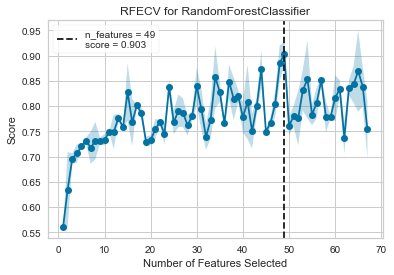

In [23]:
viz = RFECV(RandomForestClassifier(n_estimators=10, max_depth=2, n_jobs=-1, verbose=2), cv=kSplits, scoring='precision')
viz.fit(xTrain, yTrain)
viz.poof()

In [10]:
# Most important feature mask
keyFeats = [False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False]

# Create an 80/20 split for training and testing
xTrain, xTest, yTrain, yTest = train_test_split(X[:, keyFeats], y, test_size=.20, random_state=42)

In [53]:
fileName = "cleanResult.csv"

# Read in already cleaned data
df = pd.read_csv(fileName, delimiter = ",")

# Drop highly correlated columns
df = df.drop(['x2','x38'], axis=1)

# Assign prediction column and remove from training data
y = np.array(df['y'])
df = df.drop('y', axis=1)

# Scale all values so larger values don't bias results in certain ml classifiers
scaler = StandardScaler()
X = scaler.fit_transform(df)

C:\Users\Brett\Anaconda64\envs\gpu\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Brett\Anaconda64\envs\gpu\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


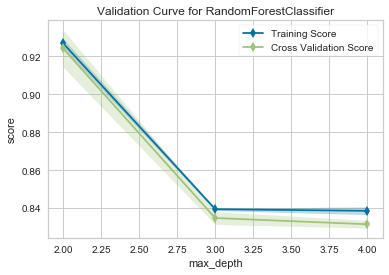

In [24]:
# Max Depth Tuning
vizDepth = ValidationCurve(
    RandomForestClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1), param_name='max_depth',
    param_range=np.arange(2, 5, 1), cv=3, scoring='precision'
)
vizDepth.fit(xTrain, yTrain)
vizDepth.poof()

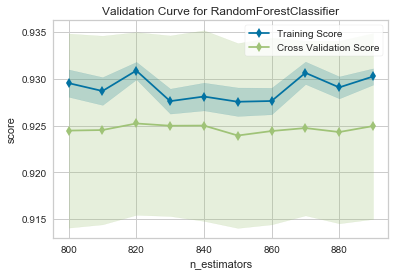

In [25]:
# Number of Trees Tuning
vizEst = ValidationCurve(
    RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, random_state=42, n_jobs=-1), param_name='n_estimators',
    param_range=np.arange(800, 900, 10), cv=3, scoring='precision'
)
vizEst.fit(xTrain, yTrain)
vizEst.poof()

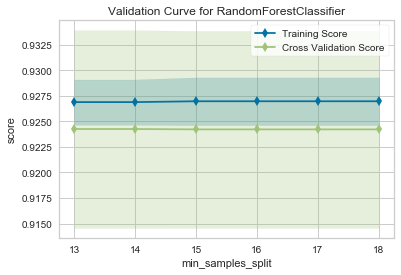

In [26]:
# Minimum Sample Split Tuning
vizSplit = ValidationCurve(
    RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, n_estimators=855, random_state=42, n_jobs=-1), param_name='min_samples_split',
    param_range=np.arange(13, 19, 1), cv=3, scoring='precision'
)
vizSplit.fit(xTrain, yTrain)
vizSplit.poof()

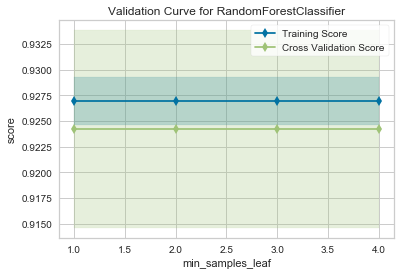

In [27]:
# Minimum Sample Leaf Tuning
vizLeaf = ValidationCurve(
    RandomForestClassifier(criterion='gini', max_depth=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1), 
    param_name='min_samples_leaf',
    param_range=np.arange(1, 5, 1), cv=3, scoring='precision'
)
vizLeaf.fit(xTrain, yTrain)
vizLeaf.poof()

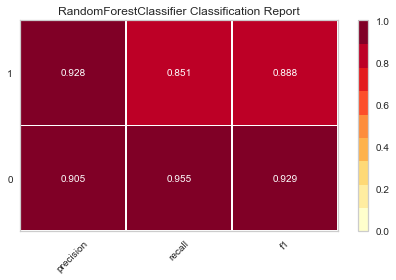

[[45570  2148]
 [ 4794 27488]]


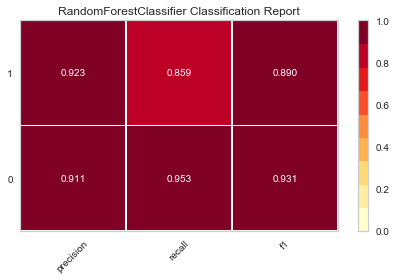

[[45803  2282]
 [ 4502 27413]]


In [72]:
# Assess performance across all 2 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()
    
    clf.fit(xTrain, yTrain)
    yhat = clf.predict(xTest)
    print(confusion_matrix(yTest, yhat))

In [16]:
clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1, verbose=2)
results = cross_val_score(clf, X, y, cv=kSplits, n_jobs=-1, verbose=1, scoring='precision')
print(f"Individual Results: {results}")
print(f"Average Score: {np.mean(results)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.8min remaining:  7.0min


Individual Results: [0.9160105  0.91470952 0.90688776 0.90818859 0.91761724 0.91092637
 0.89530686 0.91266913 0.92866407 0.91476591]
Average Score: 0.9125745925018135


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed:   11.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 855 out of 855 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed:   11.4s fi

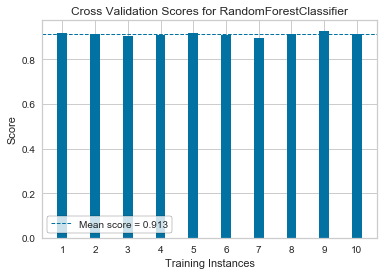

In [17]:
# Create a new figure and axes
_, ax = plt.subplots()

# Classifier
clf = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=16, n_estimators=855, random_state=42, n_jobs=-1, verbose=2)

cvScore = CVScores(
    clf, ax=ax, cv=kSplits, scoring='precision'
)

cvScore.fit(X, y)
cvScore.poof()

### Metric: ROC_AUC

In [80]:
param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(2, 30),
              "max_features": sp_randint(1, 20),
              "min_samples_split": sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 20),
              "criterion": ["gini", "entropy"]}

n_iter_search = 30
rfc = RandomForestClassifier(verbose=2, random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='roc_auc')
clf.fit(xTrain, yTrain)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 323 out of 323 | elapsed:    4.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 323 out of 323 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 323 out of 323 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 323 out of 323 | elapsed:    4.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 668 out of 668 | elapsed:   15.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 668 out of 668 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 668 out of 668 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurre

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 764 out of 764 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 764 out of 764 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 764 out of 764 | elapsed:   30.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 704 out of 704 | elapsed:    5.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 704 out of 704 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 704 out of 704 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurre

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 419 out of 419 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 419 out of 419 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 419 out of 419 | elapsed:    3.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 419 out of 419 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend Thre

[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 793 out of 793 | elapsed:   24.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 793 out of 793 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 793 out of 793 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elaps

[Parallel(n_jobs=-1)]: Done 115 out of 118 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 115 out of 118 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 118 out of 118 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 115 out of 118 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 118 out of 118 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 115 out of 118 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 118 out of 118 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 115 out of 118 | elapsed:    0.0s remaini

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 477 out of 477 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 477 out of 477 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 984 out of 984 | elapsed:    9.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 782 out of 782 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 782 out of 782 | elapsed:    9.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 782 out of 782 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

building tree 1 of 355building tree 2 of 355
building tree 3 of 355
building tree 4 of 355
building tree 5 of 355
building tree 6 of 355
building tree 7 of 355building tree 8 of 355
building tree 9 of 355
building tree 10 of 355
building tree 11 of 355building tree 12 of 355building tree 13 of 355
building tree 14 of 355
building tree 15 of 355
building tree 16 of 355building tree 17 of 355
building tree 18 of 355
building tree 19 of 355
building tree 20 of 355
building tree 21 of 355


building tree 22 of 355
building tree 23 of 355
building tree 24 of 355building tree 25 of 355building tree 26 of 355building tree 27 of 355




building tree 28 of 355

building tree 29 of 355
building tree 30 of 355
building tree 31 of 355
building tree 32 of 355

building tree 33 of 355
building tree 34 of 355
building tree 35 of 355
building tree 36 of 355
building tree 37 of 355
building tree 38 of 355
building tree 39 of 355
building tree 40 of 355
building tree 41 of 355
building tree 42 of 355
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    7.0s


building tree 131 of 355
building tree 132 of 355
building tree 133 of 355
building tree 134 of 355
building tree 135 of 355
building tree 136 of 355
building tree 137 of 355
building tree 138 of 355
building tree 139 of 355
building tree 140 of 355
building tree 141 of 355
building tree 142 of 355
building tree 143 of 355
building tree 144 of 355
building tree 145 of 355
building tree 146 of 355
building tree 147 of 355
building tree 148 of 355
building tree 149 of 355
building tree 150 of 355
building tree 151 of 355
building tree 152 of 355
building tree 153 of 355
building tree 154 of 355
building tree 155 of 355
building tree 156 of 355
building tree 157 of 355
building tree 158 of 355
building tree 159 of 355
building tree 160 of 355
building tree 161 of 355
building tree 162 of 355
building tree 163 of 355
building tree 164 of 355building tree 165 of 355

building tree 166 of 355
building tree 167 of 355
building tree 168 of 355
building tree 169 of 355
building tree 170 of 355


[Parallel(n_jobs=-1)]: Done 355 out of 355 | elapsed:   21.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 355
building tree 2 of 355
building tree 3 of 355
building tree 4 of 355building tree 5 of 355building tree 6 of 355
building tree 7 of 355building tree 8 of 355
building tree 9 of 355


building tree 10 of 355building tree 11 of 355
building tree 12 of 355
building tree 13 of 355
building tree 14 of 355building tree 15 of 355

building tree 16 of 355
building tree 17 of 355

building tree 18 of 355
building tree 19 of 355
building tree 20 of 355
building tree 21 of 355
building tree 22 of 355building tree 23 of 355

building tree 24 of 355
building tree 25 of 355
building tree 26 of 355
building tree 27 of 355building tree 28 of 355
building tree 29 of 355
building tree 30 of 355

building tree 31 of 355

building tree 32 of 355
building tree 33 of 355
building tree 34 of 355building tree 35 of 355

building tree 36 of 355
building tree 37 of 355
building tree 38 of 355
building tree 39 of 355
building tree 40 of 355building tree 41 of 355

building tree 42 of 355
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.7s


building tree 132 of 355
building tree 133 of 355
building tree 134 of 355
building tree 135 of 355
building tree 136 of 355
building tree 137 of 355
building tree 138 of 355
building tree 139 of 355
building tree 140 of 355
building tree 141 of 355
building tree 142 of 355
building tree 143 of 355
building tree 144 of 355
building tree 145 of 355
building tree 146 of 355
building tree 147 of 355
building tree 148 of 355
building tree 149 of 355
building tree 150 of 355
building tree 151 of 355
building tree 152 of 355
building tree 153 of 355
building tree 154 of 355
building tree 155 of 355
building tree 156 of 355
building tree 157 of 355
building tree 158 of 355
building tree 159 of 355
building tree 160 of 355
building tree 161 of 355
building tree 162 of 355
building tree 163 of 355
building tree 164 of 355
building tree 165 of 355
building tree 166 of 355
building tree 167 of 355
building tree 168 of 355
building tree 169 of 355
building tree 170 of 355
building tree 171 of 355


[Parallel(n_jobs=-1)]: Done 355 out of 355 | elapsed:   14.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 355 out of 355 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 355 out of 355 | elapsed:    0.4s finished


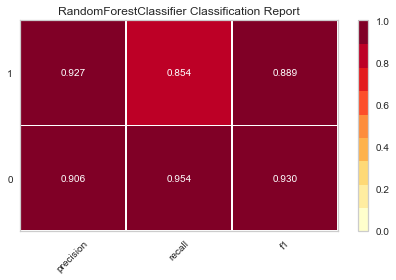

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 355
building tree 2 of 355building tree 3 of 355building tree 4 of 355
building tree 5 of 355
building tree 6 of 355
building tree 7 of 355
building tree 8 of 355building tree 9 of 355building tree 10 of 355
building tree 11 of 355
building tree 12 of 355building tree 13 of 355building tree 14 of 355


building tree 15 of 355
building tree 16 of 355
building tree 17 of 355building tree 18 of 355
building tree 19 of 355

building tree 20 of 355
building tree 21 of 355
building tree 22 of 355

building tree 23 of 355
building tree 24 of 355
building tree 25 of 355
building tree 26 of 355

building tree 27 of 355building tree 28 of 355


building tree 29 of 355
building tree 30 of 355
building tree 31 of 355
building tree 32 of 355

building tree 33 of 355
building tree 34 of 355
building tree 35 of 355
building tree 36 of 355
building tree 37 of 355
building tree 38 of 355
building tree 39 of 355
building tree 40 of 355
building tree 41 of 355
building tree 42 of 355
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.7s


building tree 133 of 355
building tree 134 of 355
building tree 135 of 355
building tree 136 of 355
building tree 137 of 355
building tree 138 of 355
building tree 139 of 355
building tree 140 of 355
building tree 141 of 355building tree 142 of 355

building tree 143 of 355
building tree 144 of 355
building tree 145 of 355
building tree 146 of 355
building tree 147 of 355
building tree 148 of 355
building tree 149 of 355
building tree 150 of 355
building tree 151 of 355
building tree 152 of 355
building tree 153 of 355
building tree 154 of 355
building tree 155 of 355
building tree 156 of 355
building tree 157 of 355
building tree 158 of 355
building tree 159 of 355
building tree 160 of 355
building tree 161 of 355
building tree 162 of 355
building tree 163 of 355
building tree 164 of 355
building tree 165 of 355
building tree 166 of 355
building tree 167 of 355
building tree 168 of 355
building tree 169 of 355
building tree 170 of 355
building tree 171 of 355
building tree 172 of 355


[Parallel(n_jobs=-1)]: Done 355 out of 355 | elapsed:   14.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 355 out of 355 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 355 out of 355 | elapsed:    0.4s finished


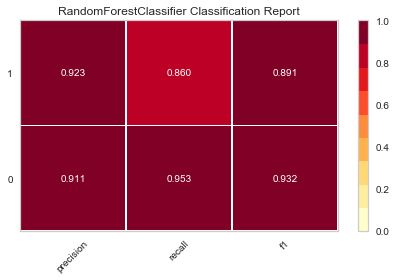

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 355building tree 2 of 355
building tree 3 of 355
building tree 4 of 355building tree 5 of 355
building tree 6 of 355building tree 7 of 355building tree 8 of 355building tree 9 of 355

building tree 10 of 355
building tree 11 of 355
building tree 12 of 355building tree 13 of 355building tree 14 of 355
building tree 15 of 355
building tree 16 of 355
building tree 17 of 355

building tree 18 of 355building tree 19 of 355

building tree 20 of 355


building tree 21 of 355
building tree 22 of 355
building tree 23 of 355
building tree 24 of 355
building tree 25 of 355building tree 26 of 355
building tree 27 of 355building tree 28 of 355

building tree 29 of 355building tree 30 of 355


building tree 31 of 355


building tree 32 of 355

building tree 33 of 355
building tree 34 of 355
building tree 35 of 355
building tree 36 of 355
building tree 37 of 355
building tree 38 of 355
building tree 39 of 355
building tree 40 of 355
building tree 41 of 355
building tree 42 of 355
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.8s


building tree 139 of 355
building tree 140 of 355
building tree 141 of 355
building tree 142 of 355
building tree 143 of 355
building tree 144 of 355
building tree 145 of 355
building tree 146 of 355
building tree 147 of 355
building tree 148 of 355
building tree 149 of 355
building tree 150 of 355
building tree 151 of 355
building tree 152 of 355
building tree 153 of 355
building tree 154 of 355
building tree 155 of 355
building tree 156 of 355
building tree 157 of 355
building tree 158 of 355
building tree 159 of 355
building tree 160 of 355
building tree 161 of 355
building tree 162 of 355
building tree 163 of 355
building tree 164 of 355
building tree 165 of 355
building tree 166 of 355
building tree 167 of 355
building tree 168 of 355
building tree 169 of 355
building tree 170 of 355
building tree 171 of 355
building tree 172 of 355
building tree 173 of 355
building tree 174 of 355
building tree 175 of 355
building tree 176 of 355
building tree 177 of 355
building tree 178 of 355


[Parallel(n_jobs=-1)]: Done 355 out of 355 | elapsed:   14.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s


[[45810  2275]
 [ 4453 27462]]


[Parallel(n_jobs=32)]: Done 355 out of 355 | elapsed:    0.4s finished


In [81]:
# Assess performance across all 10 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_leaf=2, min_samples_split=17, n_estimators=355, random_state=42, n_jobs=-1, verbose=2)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()
    
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

print(confusion_matrix(yTest, yhat))

### Metric: f1

In [82]:
param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(2, 30),
              "min_samples_split": sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 20),
              "criterion": ["gini", "entropy"]}

n_iter_search = 30
rfc = RandomForestClassifier(verbose=2, random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='f1')
clf.fit(xTrain, yTrain)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 593 out of 593 | elapsed:   13.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 593 out of 593 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 593 out of 593 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 301 tas

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 953 out of 953 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 953 out of 953 | elapsed:   13.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 953 out of 953 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 767 out of 767 | elapsed:   14.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 767 out of 767 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 767 out of 767 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 934 out of 934 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 934 out of 934 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 265 out of 265 | elapsed:    3.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 265 out of 265 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend Thre

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 124 out of 124 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 124 out of 124 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 124 out of 124 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 124 out of 124 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 124 out of 124 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 124 out of 124 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent w

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 529 out of 529 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    3.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 224 out of 224 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 224 out of 224 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:    3.5s finished
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 453 out of 453 | elapsed:    3.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 453 out of 453 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 453 out of 453 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:    2.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]

[Parallel(n_jobs=-1)]: Done  25 out of  58 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  55 out of  58 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  25 out of  58 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  55 out of  58 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  58 out of  58 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  25 out of  58 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  55 out of  58 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  58 out of  58 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  58 | elapsed:    0.6

building tree 1 of 529building tree 2 of 529
building tree 3 of 529
building tree 4 of 529building tree 5 of 529
building tree 6 of 529
building tree 7 of 529
building tree 8 of 529
building tree 9 of 529
building tree 10 of 529building tree 11 of 529
building tree 12 of 529
building tree 13 of 529
building tree 14 of 529building tree 15 of 529
building tree 16 of 529building tree 17 of 529building tree 18 of 529
building tree 19 of 529



building tree 20 of 529
building tree 21 of 529
building tree 22 of 529
building tree 23 of 529building tree 24 of 529
building tree 25 of 529building tree 26 of 529
building tree 27 of 529
building tree 28 of 529
building tree 29 of 529

building tree 30 of 529



building tree 31 of 529
building tree 32 of 529

building tree 33 of 529
building tree 34 of 529
building tree 35 of 529
building tree 36 of 529
building tree 37 of 529
building tree 38 of 529
building tree 39 of 529
building tree 40 of 529
building tree 41 of 529
building tree 42 of 529
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.3s


building tree 132 of 529
building tree 133 of 529
building tree 134 of 529
building tree 135 of 529
building tree 136 of 529
building tree 137 of 529
building tree 138 of 529
building tree 139 of 529
building tree 140 of 529
building tree 141 of 529
building tree 142 of 529
building tree 143 of 529
building tree 144 of 529
building tree 145 of 529
building tree 146 of 529
building tree 147 of 529
building tree 148 of 529
building tree 149 of 529
building tree 150 of 529
building tree 151 of 529
building tree 152 of 529
building tree 153 of 529
building tree 154 of 529
building tree 155 of 529
building tree 156 of 529
building tree 157 of 529
building tree 158 of 529
building tree 159 of 529
building tree 160 of 529
building tree 161 of 529
building tree 162 of 529
building tree 163 of 529
building tree 164 of 529
building tree 165 of 529
building tree 166 of 529
building tree 167 of 529
building tree 168 of 529
building tree 169 of 529building tree 170 of 529

building tree 171 of 529


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   12.0s


building tree 336 of 529
building tree 337 of 529
building tree 338 of 529
building tree 339 of 529
building tree 340 of 529
building tree 341 of 529
building tree 342 of 529
building tree 343 of 529
building tree 344 of 529
building tree 345 of 529
building tree 346 of 529
building tree 347 of 529
building tree 348 of 529
building tree 349 of 529
building tree 350 of 529
building tree 351 of 529
building tree 352 of 529
building tree 353 of 529
building tree 354 of 529
building tree 355 of 529
building tree 356 of 529
building tree 357 of 529
building tree 358 of 529
building tree 359 of 529
building tree 360 of 529
building tree 361 of 529
building tree 362 of 529
building tree 363 of 529
building tree 364 of 529
building tree 365 of 529building tree 366 of 529

building tree 367 of 529
building tree 368 of 529
building tree 369 of 529
building tree 370 of 529
building tree 371 of 529
building tree 372 of 529
building tree 373 of 529
building tree 374 of 529
building tree 375 of 529


[Parallel(n_jobs=-1)]: Done 529 out of 529 | elapsed:   20.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 529building tree 2 of 529
building tree 3 of 529
building tree 4 of 529building tree 5 of 529building tree 6 of 529
building tree 7 of 529building tree 8 of 529
building tree 9 of 529building tree 10 of 529building tree 11 of 529
building tree 12 of 529
building tree 13 of 529
building tree 14 of 529
building tree 15 of 529building tree 16 of 529
building tree 17 of 529

building tree 18 of 529
building tree 19 of 529
building tree 20 of 529building tree 21 of 529building tree 22 of 529

building tree 23 of 529building tree 24 of 529

building tree 25 of 529
building tree 26 of 529

building tree 27 of 529



building tree 28 of 529

building tree 29 of 529building tree 30 of 529building tree 31 of 529



building tree 32 of 529

building tree 33 of 529
building tree 34 of 529
building tree 35 of 529building tree 36 of 529

building tree 37 of 529
building tree 38 of 529
building tree 39 of 529
building tree 40 of 529
building tree 41 of 529
building tree 42 of 529
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.4s


building tree 132 of 529
building tree 133 of 529
building tree 134 of 529
building tree 135 of 529building tree 136 of 529

building tree 137 of 529
building tree 138 of 529
building tree 139 of 529
building tree 140 of 529
building tree 141 of 529
building tree 142 of 529
building tree 143 of 529
building tree 144 of 529
building tree 145 of 529
building tree 146 of 529
building tree 147 of 529
building tree 148 of 529
building tree 149 of 529
building tree 150 of 529
building tree 151 of 529
building tree 152 of 529
building tree 153 of 529
building tree 154 of 529
building tree 155 of 529
building tree 156 of 529
building tree 157 of 529
building tree 158 of 529
building tree 159 of 529
building tree 160 of 529
building tree 161 of 529
building tree 162 of 529
building tree 163 of 529
building tree 164 of 529
building tree 165 of 529
building tree 166 of 529
building tree 167 of 529
building tree 168 of 529
building tree 169 of 529
building tree 170 of 529
building tree 171 of 529


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   12.8s


building tree 337 of 529
building tree 338 of 529
building tree 339 of 529
building tree 340 of 529
building tree 341 of 529
building tree 342 of 529
building tree 343 of 529
building tree 344 of 529
building tree 345 of 529
building tree 346 of 529
building tree 347 of 529
building tree 348 of 529
building tree 349 of 529
building tree 350 of 529
building tree 351 of 529
building tree 352 of 529
building tree 353 of 529
building tree 354 of 529
building tree 355 of 529
building tree 356 of 529
building tree 357 of 529
building tree 358 of 529
building tree 359 of 529
building tree 360 of 529
building tree 361 of 529
building tree 362 of 529
building tree 363 of 529
building tree 364 of 529
building tree 365 of 529
building tree 366 of 529
building tree 367 of 529
building tree 368 of 529
building tree 369 of 529
building tree 370 of 529
building tree 371 of 529
building tree 372 of 529
building tree 373 of 529
building tree 374 of 529
building tree 375 of 529
building tree 376 of 529


[Parallel(n_jobs=-1)]: Done 529 out of 529 | elapsed:   22.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 529 out of 529 | elapsed:    0.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 529 out of 529 | elapsed:    0.8s finished


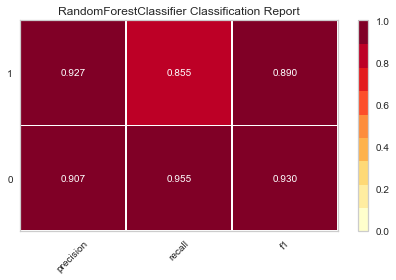

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 529building tree 2 of 529building tree 3 of 529
building tree 4 of 529
building tree 5 of 529building tree 6 of 529building tree 7 of 529
building tree 8 of 529
building tree 9 of 529
building tree 10 of 529
building tree 11 of 529building tree 12 of 529

building tree 13 of 529building tree 14 of 529


building tree 15 of 529
building tree 16 of 529

building tree 17 of 529
building tree 18 of 529

building tree 19 of 529

building tree 20 of 529building tree 21 of 529
building tree 22 of 529
building tree 23 of 529building tree 24 of 529
building tree 25 of 529building tree 26 of 529
building tree 27 of 529building tree 28 of 529
building tree 29 of 529

building tree 30 of 529
building tree 31 of 529



building tree 32 of 529
building tree 33 of 529
building tree 34 of 529
building tree 35 of 529
building tree 36 of 529
building tree 37 of 529
building tree 38 of 529
building tree 39 of 529
building tree 40 of 529
building tree 41 of 529
building tree 42 of 529bu

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.8s


building tree 133 of 529
building tree 134 of 529
building tree 135 of 529
building tree 136 of 529
building tree 137 of 529
building tree 138 of 529
building tree 139 of 529
building tree 140 of 529
building tree 141 of 529
building tree 142 of 529
building tree 143 of 529
building tree 144 of 529
building tree 145 of 529
building tree 146 of 529
building tree 147 of 529
building tree 148 of 529
building tree 149 of 529
building tree 150 of 529
building tree 151 of 529
building tree 152 of 529
building tree 153 of 529
building tree 154 of 529
building tree 155 of 529
building tree 156 of 529
building tree 157 of 529
building tree 158 of 529
building tree 159 of 529
building tree 160 of 529
building tree 161 of 529
building tree 162 of 529building tree 163 of 529

building tree 164 of 529
building tree 165 of 529
building tree 166 of 529
building tree 167 of 529
building tree 168 of 529
building tree 169 of 529
building tree 170 of 529
building tree 171 of 529
building tree 172 of 529


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   13.4s


building tree 333 of 529
building tree 334 of 529
building tree 335 of 529
building tree 336 of 529
building tree 337 of 529
building tree 338 of 529
building tree 339 of 529
building tree 340 of 529
building tree 341 of 529
building tree 342 of 529
building tree 343 of 529
building tree 344 of 529
building tree 345 of 529
building tree 346 of 529
building tree 347 of 529
building tree 348 of 529
building tree 349 of 529
building tree 350 of 529
building tree 351 of 529
building tree 352 of 529
building tree 353 of 529
building tree 354 of 529
building tree 355 of 529
building tree 356 of 529
building tree 357 of 529
building tree 358 of 529
building tree 359 of 529
building tree 360 of 529
building tree 361 of 529
building tree 362 of 529
building tree 363 of 529
building tree 364 of 529
building tree 365 of 529
building tree 366 of 529
building tree 367 of 529
building tree 368 of 529
building tree 369 of 529
building tree 370 of 529
building tree 371 of 529
building tree 372 of 529


[Parallel(n_jobs=-1)]: Done 529 out of 529 | elapsed:   22.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 529 out of 529 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 529 out of 529 | elapsed:    0.7s finished


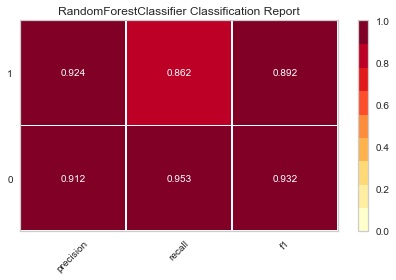

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 529
building tree 2 of 529
building tree 3 of 529building tree 4 of 529
building tree 5 of 529
building tree 6 of 529building tree 7 of 529
building tree 8 of 529
building tree 9 of 529building tree 10 of 529

building tree 11 of 529building tree 12 of 529building tree 13 of 529
building tree 14 of 529
building tree 15 of 529

building tree 16 of 529
building tree 17 of 529

building tree 18 of 529
building tree 19 of 529

building tree 20 of 529
building tree 21 of 529building tree 22 of 529

building tree 23 of 529

building tree 24 of 529
building tree 25 of 529building tree 26 of 529

building tree 27 of 529building tree 28 of 529

building tree 29 of 529building tree 30 of 529

building tree 31 of 529building tree 32 of 529

building tree 33 of 529
building tree 34 of 529
building tree 35 of 529
building tree 36 of 529
building tree 37 of 529
building tree 38 of 529
building tree 39 of 529
building tree 40 of 529
building tree 41 of 529
building tree 42 of 529
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.5s


building tree 140 of 529
building tree 141 of 529
building tree 142 of 529
building tree 143 of 529
building tree 144 of 529
building tree 145 of 529
building tree 146 of 529
building tree 147 of 529
building tree 148 of 529
building tree 149 of 529
building tree 150 of 529
building tree 151 of 529
building tree 152 of 529
building tree 153 of 529
building tree 154 of 529
building tree 155 of 529
building tree 156 of 529
building tree 157 of 529
building tree 158 of 529
building tree 159 of 529
building tree 160 of 529
building tree 161 of 529
building tree 162 of 529
building tree 163 of 529
building tree 164 of 529
building tree 165 of 529
building tree 166 of 529
building tree 167 of 529
building tree 168 of 529
building tree 169 of 529
building tree 170 of 529
building tree 171 of 529
building tree 172 of 529
building tree 173 of 529
building tree 174 of 529
building tree 175 of 529
building tree 176 of 529
building tree 177 of 529
building tree 178 of 529
building tree 179 of 529


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   13.0s


building tree 339 of 529
building tree 340 of 529building tree 341 of 529

building tree 342 of 529
building tree 343 of 529
building tree 344 of 529
building tree 345 of 529
building tree 346 of 529
building tree 347 of 529
building tree 348 of 529
building tree 349 of 529
building tree 350 of 529
building tree 351 of 529
building tree 352 of 529
building tree 353 of 529
building tree 354 of 529
building tree 355 of 529
building tree 356 of 529
building tree 357 of 529
building tree 358 of 529
building tree 359 of 529
building tree 360 of 529
building tree 361 of 529
building tree 362 of 529
building tree 363 of 529
building tree 364 of 529
building tree 365 of 529
building tree 366 of 529
building tree 367 of 529
building tree 368 of 529
building tree 369 of 529
building tree 370 of 529
building tree 371 of 529
building tree 372 of 529
building tree 373 of 529
building tree 374 of 529
building tree 375 of 529
building tree 376 of 529
building tree 377 of 529
building tree 378 of 529


[Parallel(n_jobs=-1)]: Done 529 out of 529 | elapsed:   22.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s


[[45812  2273]
 [ 4414 27501]]


[Parallel(n_jobs=32)]: Done 529 out of 529 | elapsed:    0.8s finished


In [83]:
# Assess performance across all 10 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='entropy', max_depth=26, min_samples_leaf=2, min_samples_split=17, n_estimators=529, random_state=42, n_jobs=-1, verbose=2)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()
    
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

print(confusion_matrix(yTest, yhat))

### Metric: Accuracy

In [84]:
param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(2, 30),
              "min_samples_split": sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 20),
              "criterion": ["gini", "entropy"]}

n_iter_search = 30
rfc = RandomForestClassifier(verbose=2, random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='accuracy')
clf.fit(xTrain, yTrain)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:   12.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 588 out of 588 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 588 out of 588 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 301 tas

[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 948 out of 948 | elapsed:   13.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 948 out of 948 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 948 out of 948 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elaps

[Parallel(n_jobs=32)]: Done 983 out of 983 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 983 out of 983 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 983 out of 983 | elapsed:   13.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 926 out of 926 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 926 out of 926 | elapsed:   12.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 926 out of 926 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 137 out of 137 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 796 out of 796 | elapsed:   10.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 796 out of 796 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 30

[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 831 out of 831 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 831 out of 831 | elapsed:   18.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 831 out of 831 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurre

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 700 out of 700 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    9.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 700 out of 700 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 559 out of 559 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 559 out of 559 | elapsed:    6.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 559 out of 559 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 30

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 con

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 527 out of 527 | elapsed:    7.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 527 out of 527 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 527 out of 527 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tas

building tree 1 of 303building tree 2 of 303building tree 3 of 303building tree 4 of 303
building tree 5 of 303building tree 6 of 303
building tree 7 of 303building tree 8 of 303
building tree 9 of 303building tree 10 of 303
building tree 11 of 303
building tree 12 of 303
building tree 13 of 303
building tree 14 of 303
building tree 15 of 303
building tree 16 of 303building tree 17 of 303
building tree 18 of 303

building tree 19 of 303
building tree 20 of 303
building tree 21 of 303building tree 22 of 303
building tree 23 of 303building tree 24 of 303
building tree 25 of 303
building tree 26 of 303
building tree 27 of 303
building tree 28 of 303




building tree 29 of 303

building tree 30 of 303


building tree 31 of 303
building tree 32 of 303

building tree 33 of 303
building tree 34 of 303
building tree 35 of 303
building tree 36 of 303
building tree 37 of 303
building tree 38 of 303
building tree 39 of 303
building tree 40 of 303
building tree 41 of 303
building tree 42 of 303
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.3s


building tree 140 of 303
building tree 141 of 303
building tree 142 of 303
building tree 143 of 303
building tree 144 of 303
building tree 145 of 303
building tree 146 of 303
building tree 147 of 303
building tree 148 of 303
building tree 149 of 303
building tree 150 of 303
building tree 151 of 303
building tree 152 of 303
building tree 153 of 303
building tree 154 of 303
building tree 155 of 303
building tree 156 of 303
building tree 157 of 303
building tree 158 of 303
building tree 159 of 303
building tree 160 of 303
building tree 161 of 303
building tree 162 of 303
building tree 163 of 303
building tree 164 of 303
building tree 165 of 303
building tree 166 of 303
building tree 167 of 303
building tree 168 of 303
building tree 169 of 303
building tree 170 of 303
building tree 171 of 303
building tree 172 of 303
building tree 173 of 303
building tree 174 of 303
building tree 175 of 303
building tree 176 of 303
building tree 177 of 303
building tree 178 of 303
building tree 179 of 303


[Parallel(n_jobs=-1)]: Done 303 out of 303 | elapsed:   12.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 503building tree 2 of 503building tree 3 of 503building tree 4 of 503

building tree 5 of 503building tree 6 of 503
building tree 7 of 503
building tree 8 of 503building tree 9 of 503
building tree 10 of 503building tree 11 of 503
building tree 12 of 503

building tree 13 of 503building tree 14 of 503
building tree 15 of 503
building tree 16 of 503
building tree 17 of 503
building tree 18 of 503
building tree 19 of 503
building tree 20 of 503


building tree 21 of 503
building tree 22 of 503building tree 23 of 503
building tree 24 of 503
building tree 25 of 503
building tree 26 of 503
building tree 27 of 503


building tree 28 of 503building tree 29 of 503building tree 30 of 503


building tree 31 of 503
building tree 32 of 503


building tree 33 of 503
building tree 34 of 503
building tree 35 of 503
building tree 36 of 503
building tree 37 of 503
building tree 38 of 503
building tree 39 of 503
building tree 40 of 503
building tree 41 of 503
building tree 42 of 503
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.7s


building tree 134 of 503
building tree 135 of 503
building tree 136 of 503
building tree 137 of 503
building tree 138 of 503
building tree 139 of 503
building tree 140 of 503
building tree 141 of 503
building tree 142 of 503
building tree 143 of 503
building tree 144 of 503
building tree 145 of 503
building tree 146 of 503
building tree 147 of 503
building tree 148 of 503
building tree 149 of 503
building tree 150 of 503
building tree 151 of 503
building tree 152 of 503
building tree 153 of 503
building tree 154 of 503
building tree 155 of 503
building tree 156 of 503
building tree 157 of 503
building tree 158 of 503
building tree 159 of 503
building tree 160 of 503
building tree 161 of 503
building tree 162 of 503
building tree 163 of 503
building tree 164 of 503
building tree 165 of 503
building tree 166 of 503
building tree 167 of 503
building tree 168 of 503
building tree 169 of 503
building tree 170 of 503
building tree 171 of 503
building tree 172 of 503
building tree 173 of 503


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   12.6s


building tree 341 of 503
building tree 342 of 503
building tree 343 of 503
building tree 344 of 503
building tree 345 of 503
building tree 346 of 503
building tree 347 of 503
building tree 348 of 503
building tree 349 of 503
building tree 350 of 503
building tree 351 of 503
building tree 352 of 503
building tree 353 of 503
building tree 354 of 503
building tree 355 of 503
building tree 356 of 503
building tree 357 of 503
building tree 358 of 503
building tree 359 of 503
building tree 360 of 503
building tree 361 of 503
building tree 362 of 503
building tree 363 of 503
building tree 364 of 503
building tree 365 of 503
building tree 366 of 503
building tree 367 of 503
building tree 368 of 503
building tree 369 of 503
building tree 370 of 503
building tree 371 of 503
building tree 372 of 503
building tree 373 of 503
building tree 374 of 503
building tree 375 of 503
building tree 376 of 503
building tree 377 of 503
building tree 378 of 503
building tree 379 of 503
building tree 380 of 503


[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed:   20.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 503 out of 503 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 503 out of 503 | elapsed:    0.7s finished


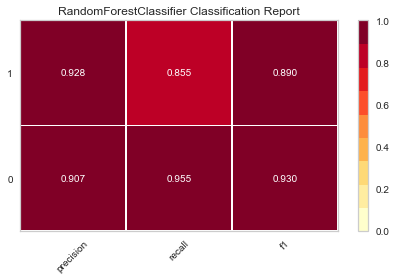

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 503building tree 2 of 503building tree 3 of 503
building tree 4 of 503
building tree 5 of 503
building tree 6 of 503
building tree 7 of 503

building tree 8 of 503
building tree 9 of 503
building tree 10 of 503
building tree 11 of 503
building tree 12 of 503building tree 13 of 503building tree 14 of 503
building tree 15 of 503
building tree 16 of 503
building tree 17 of 503building tree 18 of 503
building tree 19 of 503


building tree 20 of 503
building tree 21 of 503

building tree 22 of 503
building tree 23 of 503
building tree 24 of 503
building tree 25 of 503building tree 26 of 503
building tree 27 of 503
building tree 28 of 503

building tree 29 of 503
building tree 30 of 503
building tree 31 of 503

building tree 32 of 503
building tree 33 of 503
building tree 34 of 503
building tree 35 of 503
building tree 36 of 503
building tree 37 of 503
building tree 38 of 503
building tree 39 of 503
building tree 40 of 503
building tree 41 of 503
building tree 42 of 503
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.4s


building tree 134 of 503
building tree 135 of 503
building tree 136 of 503
building tree 137 of 503
building tree 138 of 503
building tree 139 of 503
building tree 140 of 503
building tree 141 of 503
building tree 142 of 503
building tree 143 of 503
building tree 144 of 503
building tree 145 of 503
building tree 146 of 503
building tree 147 of 503
building tree 148 of 503
building tree 149 of 503
building tree 150 of 503
building tree 151 of 503
building tree 152 of 503
building tree 153 of 503
building tree 154 of 503
building tree 155 of 503
building tree 156 of 503
building tree 157 of 503
building tree 158 of 503
building tree 159 of 503
building tree 160 of 503
building tree 161 of 503
building tree 162 of 503
building tree 163 of 503
building tree 164 of 503
building tree 165 of 503
building tree 166 of 503
building tree 167 of 503
building tree 168 of 503
building tree 169 of 503
building tree 170 of 503
building tree 171 of 503
building tree 172 of 503
building tree 173 of 503


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   12.9s


building tree 338 of 503
building tree 339 of 503
building tree 340 of 503
building tree 341 of 503
building tree 342 of 503
building tree 343 of 503
building tree 344 of 503
building tree 345 of 503
building tree 346 of 503
building tree 347 of 503
building tree 348 of 503
building tree 349 of 503
building tree 350 of 503
building tree 351 of 503
building tree 352 of 503
building tree 353 of 503
building tree 354 of 503
building tree 355 of 503
building tree 356 of 503
building tree 357 of 503
building tree 358 of 503
building tree 359 of 503
building tree 360 of 503
building tree 361 of 503
building tree 362 of 503
building tree 363 of 503
building tree 364 of 503
building tree 365 of 503
building tree 366 of 503
building tree 367 of 503
building tree 368 of 503
building tree 369 of 503
building tree 370 of 503
building tree 371 of 503
building tree 372 of 503
building tree 373 of 503
building tree 374 of 503
building tree 375 of 503
building tree 376 of 503
building tree 377 of 503


[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed:   20.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 503 out of 503 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 503 out of 503 | elapsed:    0.8s finished


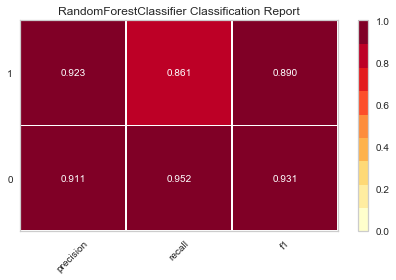

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 503building tree 2 of 503building tree 3 of 503

building tree 4 of 503
building tree 5 of 503
building tree 6 of 503
building tree 7 of 503building tree 8 of 503
building tree 9 of 503
building tree 10 of 503
building tree 11 of 503
building tree 12 of 503
building tree 13 of 503building tree 14 of 503building tree 15 of 503

building tree 16 of 503
building tree 17 of 503
building tree 18 of 503
building tree 19 of 503
building tree 20 of 503

building tree 21 of 503
building tree 22 of 503
building tree 23 of 503
building tree 24 of 503
building tree 25 of 503


building tree 26 of 503
building tree 27 of 503
building tree 28 of 503
building tree 29 of 503building tree 30 of 503building tree 31 of 503
building tree 32 of 503


building tree 33 of 503
building tree 34 of 503
building tree 35 of 503
building tree 36 of 503
building tree 37 of 503
building tree 38 of 503
building tree 39 of 503
building tree 40 of 503
building tree 41 of 503
building tree 42 of 503
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.6s


building tree 137 of 503
building tree 138 of 503
building tree 139 of 503
building tree 140 of 503
building tree 141 of 503
building tree 142 of 503
building tree 143 of 503
building tree 144 of 503
building tree 145 of 503
building tree 146 of 503
building tree 147 of 503
building tree 148 of 503
building tree 149 of 503
building tree 150 of 503
building tree 151 of 503
building tree 152 of 503
building tree 153 of 503
building tree 154 of 503
building tree 155 of 503
building tree 156 of 503
building tree 157 of 503
building tree 158 of 503
building tree 159 of 503
building tree 160 of 503
building tree 161 of 503building tree 162 of 503

building tree 163 of 503
building tree 164 of 503
building tree 165 of 503
building tree 166 of 503
building tree 167 of 503
building tree 168 of 503
building tree 169 of 503
building tree 170 of 503
building tree 171 of 503
building tree 172 of 503
building tree 173 of 503
building tree 174 of 503
building tree 175 of 503
building tree 176 of 503


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   12.5s


building tree 340 of 503
building tree 341 of 503
building tree 342 of 503
building tree 343 of 503
building tree 344 of 503
building tree 345 of 503
building tree 346 of 503
building tree 347 of 503
building tree 348 of 503
building tree 349 of 503
building tree 350 of 503
building tree 351 of 503
building tree 352 of 503
building tree 353 of 503
building tree 354 of 503
building tree 355 of 503
building tree 356 of 503
building tree 357 of 503
building tree 358 of 503
building tree 359 of 503
building tree 360 of 503
building tree 361 of 503
building tree 362 of 503
building tree 363 of 503
building tree 364 of 503
building tree 365 of 503
building tree 366 of 503
building tree 367 of 503
building tree 368 of 503
building tree 369 of 503
building tree 370 of 503
building tree 371 of 503
building tree 372 of 503
building tree 373 of 503
building tree 374 of 503
building tree 375 of 503
building tree 376 of 503
building tree 377 of 503
building tree 378 of 503
building tree 379 of 503


[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed:   19.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s


[[45779  2306]
 [ 4452 27463]]


[Parallel(n_jobs=32)]: Done 503 out of 503 | elapsed:    0.7s finished


In [85]:
# Assess performance across all 10 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='entropy', max_depth=22, min_samples_leaf=4, min_samples_split=11, n_estimators=503, random_state=42, n_jobs=-1, verbose=2)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()
    
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

print(confusion_matrix(yTest, yhat))

### Metric: Recall

In [88]:
param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(2, 30),
              "min_samples_split": sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 20),
              "criterion": ["gini", "entropy"]}

n_iter_search = 30
rfc = RandomForestClassifier(verbose=2, random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='recall')
clf.fit(xTrain, yTrain)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 667 out of 667 | elapsed:    8.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 667 out of 667 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 667 out of 667 | elapsed:    0.

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 999 out of 999 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 808 out of 808 | elapsed:   11.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 808 out of 808 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 842 out of 842 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103 out of 110 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 103 out of 110 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 103 out of 110 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 103

[Parallel(n_jobs=-1)]: Done  14 out of  51 | elapsed:    0.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  40 out of  51 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  14 out of  51 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  40 out of  51 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  14 out of  51 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  40 out of  51 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  51 | elapsed:    0.5

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 419 out of 419 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 419 out of 419 | elapsed:    4.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 419 out of 419 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 419 out of 419 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend Loky

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 545 out of 545 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 545 out of 545 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 545 out of 545 | elapsed:    9.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 545 out of 545 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend Thre

[Parallel(n_jobs=32)]: Done  79 out of  94 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  79 out of  94 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 583 out of 583 | elapsed:   11.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 583 out of 583 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 con

[Parallel(n_jobs=32)]: Done 498 out of 498 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 674 out of 674 | elapsed:    8.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 674 out of 674 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elaps

[Parallel(n_jobs=-1)]: Done 586 out of 586 | elapsed:    7.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 586 out of 586 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 586 out of 586 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 586 out of 586 | elapsed:    7.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]

[Parallel(n_jobs=32)]: Done 828 out of 828 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 828 out of 828 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 828 out of 828 | elapsed:   11.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elaps

building tree 1 of 808
building tree 2 of 808building tree 3 of 808building tree 4 of 808

building tree 5 of 808
building tree 6 of 808building tree 7 of 808
building tree 8 of 808


building tree 9 of 808
building tree 10 of 808building tree 11 of 808building tree 12 of 808
building tree 13 of 808
building tree 14 of 808building tree 15 of 808

building tree 16 of 808
building tree 17 of 808building tree 18 of 808


building tree 19 of 808
building tree 20 of 808building tree 21 of 808building tree 22 of 808building tree 23 of 808
building tree 24 of 808building tree 25 of 808
building tree 26 of 808building tree 27 of 808
building tree 28 of 808
building tree 29 of 808building tree 30 of 808building tree 31 of 808







building tree 32 of 808

building tree 33 of 808
building tree 34 of 808
building tree 35 of 808
building tree 36 of 808
building tree 37 of 808
building tree 38 of 808
building tree 39 of 808
building tree 40 of 808
building tree 41 of 808building tree 42 of 808

b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.9s


building tree 147 of 808
building tree 148 of 808
building tree 149 of 808
building tree 150 of 808
building tree 151 of 808
building tree 152 of 808
building tree 153 of 808
building tree 154 of 808
building tree 155 of 808
building tree 156 of 808
building tree 157 of 808
building tree 158 of 808
building tree 159 of 808
building tree 160 of 808
building tree 161 of 808
building tree 162 of 808
building tree 163 of 808
building tree 164 of 808
building tree 165 of 808
building tree 166 of 808
building tree 167 of 808
building tree 168 of 808
building tree 169 of 808
building tree 170 of 808
building tree 171 of 808
building tree 172 of 808
building tree 173 of 808
building tree 174 of 808
building tree 175 of 808
building tree 176 of 808
building tree 177 of 808
building tree 178 of 808
building tree 179 of 808
building tree 180 of 808
building tree 181 of 808
building tree 182 of 808
building tree 183 of 808
building tree 184 of 808building tree 185 of 808

building tree 186 of 808


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.6s


building tree 342 of 808
building tree 343 of 808
building tree 344 of 808
building tree 345 of 808
building tree 346 of 808
building tree 347 of 808
building tree 348 of 808
building tree 349 of 808
building tree 350 of 808
building tree 351 of 808
building tree 352 of 808
building tree 353 of 808
building tree 354 of 808
building tree 355 of 808
building tree 356 of 808
building tree 357 of 808
building tree 358 of 808
building tree 359 of 808
building tree 360 of 808
building tree 361 of 808
building tree 362 of 808
building tree 363 of 808
building tree 364 of 808
building tree 365 of 808
building tree 366 of 808
building tree 367 of 808
building tree 368 of 808
building tree 369 of 808
building tree 370 of 808
building tree 371 of 808building tree 372 of 808

building tree 373 of 808
building tree 374 of 808
building tree 375 of 808
building tree 376 of 808
building tree 377 of 808
building tree 378 of 808
building tree 379 of 808
building tree 380 of 808
building tree 381 of 808b

[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   14.3s


building tree 623 of 808
building tree 624 of 808
building tree 625 of 808
building tree 626 of 808
building tree 627 of 808
building tree 628 of 808
building tree 629 of 808
building tree 630 of 808
building tree 631 of 808
building tree 632 of 808
building tree 633 of 808
building tree 634 of 808
building tree 635 of 808
building tree 636 of 808
building tree 637 of 808
building tree 638 of 808
building tree 639 of 808
building tree 640 of 808
building tree 641 of 808
building tree 642 of 808
building tree 643 of 808
building tree 644 of 808
building tree 645 of 808
building tree 646 of 808
building tree 647 of 808
building tree 648 of 808
building tree 649 of 808
building tree 650 of 808
building tree 651 of 808
building tree 652 of 808
building tree 653 of 808
building tree 654 of 808
building tree 655 of 808
building tree 656 of 808
building tree 657 of 808
building tree 658 of 808
building tree 659 of 808
building tree 660 of 808
building tree 661 of 808
building tree 662 of 808


[Parallel(n_jobs=-1)]: Done 808 out of 808 | elapsed:   19.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 808building tree 2 of 808
building tree 3 of 808building tree 4 of 808
building tree 5 of 808
building tree 6 of 808
building tree 7 of 808
building tree 8 of 808

building tree 9 of 808
building tree 10 of 808building tree 11 of 808building tree 12 of 808building tree 13 of 808
building tree 14 of 808
building tree 15 of 808
building tree 16 of 808

building tree 17 of 808
building tree 18 of 808
building tree 19 of 808
building tree 20 of 808
building tree 21 of 808building tree 22 of 808building tree 23 of 808
building tree 24 of 808building tree 25 of 808
building tree 26 of 808

building tree 27 of 808

building tree 28 of 808
building tree 29 of 808
building tree 30 of 808building tree 31 of 808



building tree 32 of 808


building tree 33 of 808
building tree 34 of 808
building tree 35 of 808building tree 36 of 808

building tree 37 of 808
building tree 38 of 808
building tree 39 of 808
building tree 40 of 808building tree 41 of 808

building tree 42 of 808
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.9s


building tree 142 of 808building tree 143 of 808building tree 144 of 808


building tree 145 of 808
building tree 146 of 808
building tree 147 of 808
building tree 148 of 808
building tree 149 of 808
building tree 150 of 808
building tree 151 of 808
building tree 152 of 808
building tree 153 of 808
building tree 154 of 808
building tree 155 of 808
building tree 156 of 808
building tree 157 of 808
building tree 158 of 808
building tree 159 of 808
building tree 160 of 808
building tree 161 of 808
building tree 162 of 808
building tree 163 of 808
building tree 164 of 808
building tree 165 of 808
building tree 166 of 808
building tree 167 of 808
building tree 168 of 808
building tree 169 of 808
building tree 170 of 808
building tree 171 of 808
building tree 172 of 808
building tree 173 of 808
building tree 174 of 808
building tree 175 of 808
building tree 176 of 808
building tree 177 of 808
building tree 178 of 808
building tree 179 of 808
building tree 180 of 808
building tree 181 of 808


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.7s


building tree 339 of 808
building tree 340 of 808
building tree 341 of 808
building tree 342 of 808
building tree 343 of 808
building tree 344 of 808
building tree 345 of 808building tree 346 of 808

building tree 347 of 808
building tree 348 of 808
building tree 349 of 808
building tree 350 of 808
building tree 351 of 808
building tree 352 of 808
building tree 353 of 808
building tree 354 of 808
building tree 355 of 808
building tree 356 of 808
building tree 357 of 808
building tree 358 of 808
building tree 359 of 808
building tree 360 of 808
building tree 361 of 808
building tree 362 of 808
building tree 363 of 808
building tree 364 of 808
building tree 365 of 808
building tree 366 of 808
building tree 367 of 808
building tree 368 of 808
building tree 369 of 808
building tree 370 of 808
building tree 371 of 808
building tree 372 of 808building tree 373 of 808

building tree 374 of 808
building tree 375 of 808
building tree 376 of 808
building tree 377 of 808
building tree 378 of 808


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   14.5s


building tree 619 of 808
building tree 620 of 808
building tree 621 of 808
building tree 622 of 808
building tree 623 of 808
building tree 624 of 808
building tree 625 of 808
building tree 626 of 808
building tree 627 of 808
building tree 628 of 808
building tree 629 of 808
building tree 630 of 808
building tree 631 of 808
building tree 632 of 808
building tree 633 of 808
building tree 634 of 808
building tree 635 of 808
building tree 636 of 808
building tree 637 of 808
building tree 638 of 808
building tree 639 of 808
building tree 640 of 808
building tree 641 of 808
building tree 642 of 808
building tree 643 of 808
building tree 644 of 808building tree 645 of 808

building tree 646 of 808
building tree 647 of 808
building tree 648 of 808
building tree 649 of 808
building tree 650 of 808
building tree 651 of 808
building tree 652 of 808
building tree 653 of 808
building tree 654 of 808
building tree 655 of 808
building tree 656 of 808
building tree 657 of 808
building tree 658 of 808


[Parallel(n_jobs=-1)]: Done 808 out of 808 | elapsed:   19.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 808 out of 808 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 808 out of 808 | elapsed:    1.1s finished


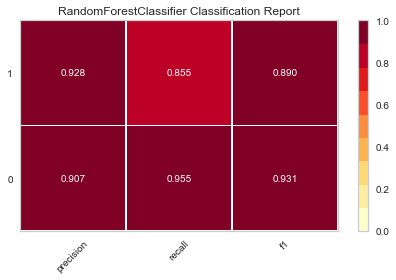

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 808
building tree 2 of 808
building tree 3 of 808
building tree 4 of 808
building tree 5 of 808
building tree 6 of 808
building tree 7 of 808building tree 8 of 808building tree 9 of 808building tree 10 of 808
building tree 11 of 808building tree 12 of 808
building tree 13 of 808
building tree 14 of 808

building tree 15 of 808building tree 16 of 808building tree 17 of 808
building tree 18 of 808
building tree 19 of 808

building tree 20 of 808
building tree 21 of 808
building tree 22 of 808
building tree 23 of 808

building tree 24 of 808building tree 25 of 808
building tree 26 of 808

building tree 27 of 808

building tree 28 of 808
building tree 29 of 808
building tree 30 of 808
building tree 31 of 808building tree 32 of 808



building tree 33 of 808
building tree 34 of 808
building tree 35 of 808
building tree 36 of 808
building tree 37 of 808
building tree 38 of 808
building tree 39 of 808
building tree 40 of 808
building tree 41 of 808
building tree 42 of 808
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.9s


building tree 151 of 808
building tree 152 of 808
building tree 153 of 808
building tree 154 of 808
building tree 155 of 808
building tree 156 of 808
building tree 157 of 808
building tree 158 of 808
building tree 159 of 808
building tree 160 of 808
building tree 161 of 808
building tree 162 of 808
building tree 163 of 808
building tree 164 of 808building tree 165 of 808

building tree 166 of 808
building tree 167 of 808
building tree 168 of 808
building tree 169 of 808
building tree 170 of 808
building tree 171 of 808
building tree 172 of 808building tree 173 of 808

building tree 174 of 808
building tree 175 of 808
building tree 176 of 808
building tree 177 of 808
building tree 178 of 808
building tree 179 of 808
building tree 180 of 808
building tree 181 of 808
building tree 182 of 808
building tree 183 of 808
building tree 184 of 808
building tree 185 of 808
building tree 186 of 808
building tree 187 of 808
building tree 188 of 808
building tree 189 of 808
building tree 190 of 808


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.5s


building tree 348 of 808
building tree 349 of 808
building tree 350 of 808
building tree 351 of 808
building tree 352 of 808
building tree 353 of 808
building tree 354 of 808
building tree 355 of 808
building tree 356 of 808
building tree 357 of 808
building tree 358 of 808
building tree 359 of 808
building tree 360 of 808
building tree 361 of 808
building tree 362 of 808
building tree 363 of 808building tree 364 of 808

building tree 365 of 808
building tree 366 of 808
building tree 367 of 808
building tree 368 of 808building tree 369 of 808

building tree 370 of 808
building tree 371 of 808
building tree 372 of 808
building tree 373 of 808
building tree 374 of 808
building tree 375 of 808
building tree 376 of 808
building tree 377 of 808
building tree 378 of 808
building tree 379 of 808
building tree 380 of 808
building tree 381 of 808
building tree 382 of 808
building tree 383 of 808
building tree 384 of 808
building tree 385 of 808
building tree 386 of 808
building tree 387 of 808


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   14.0s


building tree 619 of 808
building tree 620 of 808
building tree 621 of 808
building tree 622 of 808
building tree 623 of 808
building tree 624 of 808
building tree 625 of 808
building tree 626 of 808
building tree 627 of 808
building tree 628 of 808
building tree 629 of 808
building tree 630 of 808
building tree 631 of 808
building tree 632 of 808
building tree 633 of 808
building tree 634 of 808
building tree 635 of 808
building tree 636 of 808
building tree 637 of 808
building tree 638 of 808
building tree 639 of 808
building tree 640 of 808
building tree 641 of 808
building tree 642 of 808
building tree 643 of 808
building tree 644 of 808
building tree 645 of 808
building tree 646 of 808
building tree 647 of 808
building tree 648 of 808
building tree 649 of 808
building tree 650 of 808
building tree 651 of 808
building tree 652 of 808
building tree 653 of 808
building tree 654 of 808
building tree 655 of 808
building tree 656 of 808
building tree 657 of 808
building tree 658 of 808


[Parallel(n_jobs=-1)]: Done 808 out of 808 | elapsed:   19.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 808 out of 808 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 808 out of 808 | elapsed:    1.1s finished


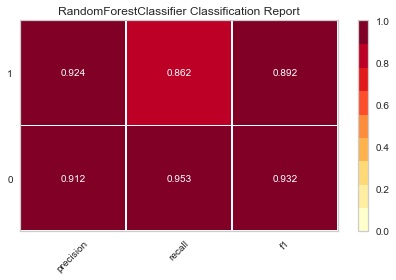

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 808
building tree 2 of 808building tree 3 of 808
building tree 4 of 808building tree 5 of 808

building tree 6 of 808
building tree 7 of 808building tree 8 of 808
building tree 9 of 808building tree 10 of 808
building tree 11 of 808building tree 12 of 808
building tree 13 of 808building tree 14 of 808
building tree 15 of 808
building tree 16 of 808
building tree 17 of 808
building tree 18 of 808
building tree 19 of 808
building tree 20 of 808

building tree 21 of 808
building tree 22 of 808building tree 23 of 808
building tree 24 of 808building tree 25 of 808building tree 26 of 808
building tree 27 of 808
building tree 28 of 808





building tree 29 of 808

building tree 30 of 808
building tree 31 of 808
building tree 32 of 808

building tree 33 of 808
building tree 34 of 808
building tree 35 of 808
building tree 36 of 808
building tree 37 of 808
building tree 38 of 808
building tree 39 of 808
building tree 40 of 808
building tree 41 of 808
building tree 42 of 808
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.9s




building tree 151 of 808building tree 152 of 808

building tree 153 of 808
building tree 154 of 808
building tree 155 of 808
building tree 156 of 808
building tree 157 of 808
building tree 158 of 808
building tree 159 of 808
building tree 160 of 808
building tree 161 of 808
building tree 162 of 808
building tree 163 of 808
building tree 164 of 808
building tree 165 of 808
building tree 166 of 808
building tree 167 of 808
building tree 168 of 808
building tree 169 of 808
building tree 170 of 808
building tree 171 of 808
building tree 172 of 808
building tree 173 of 808
building tree 174 of 808
building tree 175 of 808
building tree 176 of 808
building tree 177 of 808
building tree 178 of 808
building tree 179 of 808
building tree 180 of 808
building tree 181 of 808
building tree 182 of 808
building tree 183 of 808building tree 184 of 808

building tree 185 of 808
building tree 186 of 808
building tree 187 of 808
building tree 188 of 808
building tree 189 of 808
building tree 190 of 80

[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.6s


building tree 349 of 808
building tree 350 of 808
building tree 351 of 808
building tree 352 of 808
building tree 353 of 808
building tree 354 of 808
building tree 355 of 808
building tree 356 of 808
building tree 357 of 808
building tree 358 of 808
building tree 359 of 808
building tree 360 of 808
building tree 361 of 808
building tree 362 of 808
building tree 363 of 808
building tree 364 of 808
building tree 365 of 808
building tree 366 of 808
building tree 367 of 808building tree 368 of 808

building tree 369 of 808
building tree 370 of 808
building tree 371 of 808
building tree 372 of 808
building tree 373 of 808
building tree 374 of 808
building tree 375 of 808
building tree 376 of 808
building tree 377 of 808
building tree 378 of 808
building tree 379 of 808
building tree 380 of 808
building tree 381 of 808
building tree 382 of 808
building tree 383 of 808
building tree 384 of 808
building tree 385 of 808
building tree 386 of 808
building tree 387 of 808
building tree 388 of 808


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   14.2s



building tree 620 of 808
building tree 621 of 808
building tree 622 of 808
building tree 623 of 808
building tree 624 of 808
building tree 625 of 808
building tree 626 of 808
building tree 627 of 808
building tree 628 of 808
building tree 629 of 808
building tree 630 of 808building tree 631 of 808

building tree 632 of 808
building tree 633 of 808
building tree 634 of 808
building tree 635 of 808
building tree 636 of 808
building tree 637 of 808
building tree 638 of 808
building tree 639 of 808
building tree 640 of 808
building tree 641 of 808
building tree 642 of 808
building tree 643 of 808
building tree 644 of 808
building tree 645 of 808
building tree 646 of 808
building tree 647 of 808
building tree 648 of 808
building tree 649 of 808
building tree 650 of 808
building tree 651 of 808
building tree 652 of 808
building tree 653 of 808
building tree 654 of 808
building tree 655 of 808
building tree 656 of 808
building tree 657 of 808
building tree 658 of 808
building tree 659 of 808

[Parallel(n_jobs=-1)]: Done 808 out of 808 | elapsed:   19.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.9s


[[45823  2262]
 [ 4410 27505]]


[Parallel(n_jobs=32)]: Done 808 out of 808 | elapsed:    1.2s finished


In [89]:
# Assess performance across all 10 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='gini', max_depth=25, min_samples_leaf=2, min_samples_split=7, n_estimators=808, random_state=42, n_jobs=-1, verbose=2)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()
    
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

print(confusion_matrix(yTest, yhat))

### Metric: Average_Precision

In [90]:
param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(2, 30),
              "min_samples_split": sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 20),
              "criterion": ["gini", "entropy"]}

n_iter_search = 30
rfc = RandomForestClassifier(verbose=2, random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='average_precision')
clf.fit(xTrain, yTrain)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 561 out of 561 | elapsed:   12.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 561 out of 561 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 561 out of 561 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 301 tas

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    7.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 378 out of 378 | elapsed:    0.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 378 out of 378 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 301 tas

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 999 out of 999 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 936 out of 999 | elapsed:    3.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 999 out of 999 | elapsed:    3.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 999 out of 999 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98

[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 773 out of 773 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 430 out of 430 | elapsed:    9.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend Loky

[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 940 out of 940 | elapsed:   17.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 940 out of 940 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 940 out of 940 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 901 out of 901 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 901 out of 901 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 901 out of 901 | elapsed:   11.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 788 out of 788 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 788 out of 788 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 788 out of 788 | elapsed:   10.7s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elaps

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    2.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 260 out of 260 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    2.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_

[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 927 out of 927 | elapsed:   12.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 927 out of 927 | elapsed:    0.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 927 out of 927 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elaps

[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 765 out of 765 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 765 out of 765 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 430
building tree 2 of 430building tree 3 of 430
building tree 4 of 430
building tree 5 of 430
building tree 6 of 430building tree 7 of 430
building tree 8 of 430
building tree 9 of 430building tree 10 of 430
building tree 11 of 430
building tree 12 of 430
building tree 13 of 430building tree 14 of 430building tree 15 of 430
building tree 16 of 430
building tree 17 of 430

building tree 18 of 430
building tree 19 of 430
building tree 20 of 430

building tree 21 of 430
building tree 22 of 430building tree 23 of 430
building tree 24 of 430
building tree 25 of 430
building tree 26 of 430building tree 27 of 430
building tree 28 of 430building tree 29 of 430


building tree 30 of 430


building tree 31 of 430

building tree 32 of 430

building tree 33 of 430
building tree 34 of 430
building tree 35 of 430
building tree 36 of 430
building tree 37 of 430
building tree 38 of 430
building tree 39 of 430
building tree 40 of 430
building tree 41 of 430
building tree 42 of 430
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.2s


building tree 138 of 430
building tree 139 of 430
building tree 140 of 430
building tree 141 of 430
building tree 142 of 430
building tree 143 of 430
building tree 144 of 430building tree 145 of 430

building tree 146 of 430
building tree 147 of 430
building tree 148 of 430
building tree 149 of 430
building tree 150 of 430
building tree 151 of 430
building tree 152 of 430
building tree 153 of 430
building tree 154 of 430
building tree 155 of 430
building tree 156 of 430
building tree 157 of 430
building tree 158 of 430
building tree 159 of 430
building tree 160 of 430
building tree 161 of 430
building tree 162 of 430
building tree 163 of 430
building tree 164 of 430
building tree 165 of 430
building tree 166 of 430
building tree 167 of 430
building tree 168 of 430
building tree 169 of 430
building tree 170 of 430
building tree 171 of 430
building tree 172 of 430
building tree 173 of 430
building tree 174 of 430
building tree 175 of 430
building tree 176 of 430
building tree 177 of 430


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   10.8s


building tree 345 of 430
building tree 346 of 430
building tree 347 of 430
building tree 348 of 430
building tree 349 of 430
building tree 350 of 430
building tree 351 of 430
building tree 352 of 430
building tree 353 of 430
building tree 354 of 430
building tree 355 of 430
building tree 356 of 430
building tree 357 of 430
building tree 358 of 430
building tree 359 of 430
building tree 360 of 430
building tree 361 of 430
building tree 362 of 430
building tree 363 of 430
building tree 364 of 430
building tree 365 of 430
building tree 366 of 430
building tree 367 of 430
building tree 368 of 430
building tree 369 of 430
building tree 370 of 430
building tree 371 of 430
building tree 372 of 430
building tree 373 of 430
building tree 374 of 430
building tree 375 of 430
building tree 376 of 430
building tree 377 of 430
building tree 378 of 430
building tree 379 of 430
building tree 380 of 430
building tree 381 of 430
building tree 382 of 430
building tree 383 of 430
building tree 384 of 430


[Parallel(n_jobs=-1)]: Done 430 out of 430 | elapsed:   14.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 430building tree 2 of 430
building tree 3 of 430
building tree 4 of 430building tree 5 of 430
building tree 6 of 430
building tree 7 of 430
building tree 8 of 430
building tree 9 of 430
building tree 10 of 430
building tree 11 of 430
building tree 12 of 430building tree 13 of 430
building tree 14 of 430
building tree 15 of 430
building tree 16 of 430building tree 17 of 430
building tree 18 of 430
building tree 19 of 430


building tree 20 of 430
building tree 21 of 430building tree 22 of 430

building tree 23 of 430
building tree 24 of 430
building tree 25 of 430building tree 26 of 430

building tree 27 of 430building tree 28 of 430building tree 29 of 430building tree 30 of 430building tree 31 of 430
building tree 32 of 430






building tree 33 of 430
building tree 34 of 430
building tree 35 of 430
building tree 36 of 430
building tree 37 of 430
building tree 38 of 430
building tree 39 of 430
building tree 40 of 430
building tree 41 of 430
building tree 42 of 430
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.1s


building tree 142 of 430
building tree 143 of 430
building tree 144 of 430
building tree 145 of 430
building tree 146 of 430
building tree 147 of 430
building tree 148 of 430
building tree 149 of 430
building tree 150 of 430
building tree 151 of 430
building tree 152 of 430
building tree 153 of 430
building tree 154 of 430
building tree 155 of 430
building tree 156 of 430
building tree 157 of 430
building tree 158 of 430
building tree 159 of 430
building tree 160 of 430
building tree 161 of 430
building tree 162 of 430
building tree 163 of 430
building tree 164 of 430
building tree 165 of 430
building tree 166 of 430
building tree 167 of 430
building tree 168 of 430
building tree 169 of 430
building tree 170 of 430
building tree 171 of 430
building tree 172 of 430building tree 173 of 430

building tree 174 of 430
building tree 175 of 430
building tree 176 of 430
building tree 177 of 430
building tree 178 of 430
building tree 179 of 430
building tree 180 of 430
building tree 181 of 430


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   10.7s



building tree 340 of 430
building tree 341 of 430
building tree 342 of 430
building tree 343 of 430
building tree 344 of 430
building tree 345 of 430
building tree 346 of 430
building tree 347 of 430
building tree 348 of 430
building tree 349 of 430
building tree 350 of 430
building tree 351 of 430
building tree 352 of 430
building tree 353 of 430
building tree 354 of 430
building tree 355 of 430
building tree 356 of 430
building tree 357 of 430
building tree 358 of 430
building tree 359 of 430
building tree 360 of 430
building tree 361 of 430
building tree 362 of 430
building tree 363 of 430
building tree 364 of 430
building tree 365 of 430
building tree 366 of 430
building tree 367 of 430
building tree 368 of 430
building tree 369 of 430
building tree 370 of 430
building tree 371 of 430
building tree 372 of 430
building tree 373 of 430
building tree 374 of 430
building tree 375 of 430
building tree 376 of 430
building tree 377 of 430
building tree 378 of 430
building tree 379 of 430

[Parallel(n_jobs=-1)]: Done 430 out of 430 | elapsed:   14.9s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.5s finished


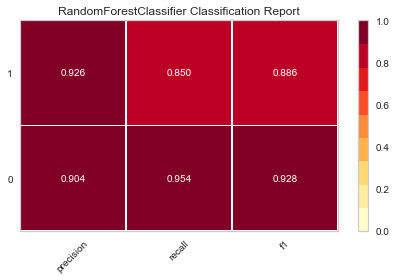

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 430building tree 2 of 430building tree 3 of 430

building tree 4 of 430building tree 5 of 430
building tree 6 of 430
building tree 7 of 430
building tree 8 of 430
building tree 9 of 430
building tree 10 of 430
building tree 11 of 430building tree 12 of 430building tree 13 of 430
building tree 14 of 430building tree 15 of 430
building tree 16 of 430

building tree 17 of 430
building tree 18 of 430
building tree 19 of 430
building tree 20 of 430building tree 21 of 430

building tree 22 of 430

building tree 23 of 430

building tree 24 of 430
building tree 25 of 430

building tree 26 of 430
building tree 27 of 430
building tree 28 of 430
building tree 29 of 430
building tree 30 of 430
building tree 31 of 430
building tree 32 of 430

building tree 33 of 430
building tree 34 of 430
building tree 35 of 430
building tree 36 of 430
building tree 37 of 430
building tree 38 of 430
building tree 39 of 430
building tree 40 of 430
building tree 41 of 430
building tree 42 of 430
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.2s


building tree 135 of 430
building tree 136 of 430
building tree 137 of 430
building tree 138 of 430
building tree 139 of 430
building tree 140 of 430
building tree 141 of 430
building tree 142 of 430
building tree 143 of 430
building tree 144 of 430
building tree 145 of 430
building tree 146 of 430
building tree 147 of 430
building tree 148 of 430
building tree 149 of 430
building tree 150 of 430
building tree 151 of 430
building tree 152 of 430
building tree 153 of 430
building tree 154 of 430
building tree 155 of 430
building tree 156 of 430
building tree 157 of 430
building tree 158 of 430
building tree 159 of 430
building tree 160 of 430
building tree 161 of 430
building tree 162 of 430
building tree 163 of 430
building tree 164 of 430
building tree 165 of 430
building tree 166 of 430
building tree 167 of 430
building tree 168 of 430
building tree 169 of 430
building tree 170 of 430
building tree 171 of 430
building tree 172 of 430
building tree 173 of 430
building tree 174 of 430


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   10.9s


building tree 345 of 430
building tree 346 of 430
building tree 347 of 430
building tree 348 of 430
building tree 349 of 430
building tree 350 of 430
building tree 351 of 430
building tree 352 of 430
building tree 353 of 430
building tree 354 of 430
building tree 355 of 430
building tree 356 of 430
building tree 357 of 430
building tree 358 of 430
building tree 359 of 430
building tree 360 of 430
building tree 361 of 430
building tree 362 of 430
building tree 363 of 430
building tree 364 of 430
building tree 365 of 430
building tree 366 of 430
building tree 367 of 430
building tree 368 of 430
building tree 369 of 430
building tree 370 of 430
building tree 371 of 430
building tree 372 of 430
building tree 373 of 430
building tree 374 of 430
building tree 375 of 430
building tree 376 of 430
building tree 377 of 430
building tree 378 of 430
building tree 379 of 430
building tree 380 of 430
building tree 381 of 430
building tree 382 of 430
building tree 383 of 430
building tree 384 of 430


[Parallel(n_jobs=-1)]: Done 430 out of 430 | elapsed:   15.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.5s finished


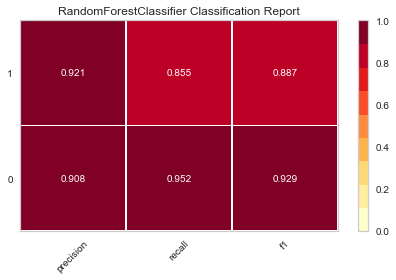

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 430
building tree 2 of 430building tree 3 of 430
building tree 4 of 430
building tree 5 of 430building tree 6 of 430
building tree 7 of 430
building tree 8 of 430
building tree 9 of 430
building tree 10 of 430
building tree 11 of 430building tree 12 of 430building tree 13 of 430building tree 14 of 430
building tree 15 of 430
building tree 16 of 430
building tree 17 of 430building tree 18 of 430
building tree 19 of 430building tree 20 of 430
building tree 21 of 430

building tree 22 of 430
building tree 23 of 430

building tree 24 of 430
building tree 25 of 430
building tree 26 of 430
building tree 27 of 430
building tree 28 of 430
building tree 29 of 430
building tree 30 of 430

building tree 31 of 430


building tree 32 of 430


building tree 33 of 430
building tree 34 of 430
building tree 35 of 430
building tree 36 of 430
building tree 37 of 430
building tree 38 of 430building tree 39 of 430

building tree 40 of 430
building tree 41 of 430
building tree 42 of 430
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.1s


building tree 138 of 430
building tree 139 of 430
building tree 140 of 430
building tree 141 of 430
building tree 142 of 430
building tree 143 of 430
building tree 144 of 430
building tree 145 of 430
building tree 146 of 430
building tree 147 of 430
building tree 148 of 430
building tree 149 of 430
building tree 150 of 430
building tree 151 of 430
building tree 152 of 430
building tree 153 of 430
building tree 154 of 430
building tree 155 of 430
building tree 156 of 430
building tree 157 of 430
building tree 158 of 430
building tree 159 of 430
building tree 160 of 430
building tree 161 of 430
building tree 162 of 430
building tree 163 of 430
building tree 164 of 430
building tree 165 of 430
building tree 166 of 430
building tree 167 of 430
building tree 168 of 430
building tree 169 of 430
building tree 170 of 430
building tree 171 of 430
building tree 172 of 430
building tree 173 of 430
building tree 174 of 430
building tree 175 of 430
building tree 176 of 430
building tree 177 of 430


[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   10.7s



building tree 343 of 430
building tree 344 of 430
building tree 345 of 430
building tree 346 of 430
building tree 347 of 430
building tree 348 of 430
building tree 349 of 430
building tree 350 of 430
building tree 351 of 430
building tree 352 of 430
building tree 353 of 430
building tree 354 of 430
building tree 355 of 430
building tree 356 of 430
building tree 357 of 430
building tree 358 of 430
building tree 359 of 430
building tree 360 of 430
building tree 361 of 430
building tree 362 of 430
building tree 363 of 430
building tree 364 of 430
building tree 365 of 430
building tree 366 of 430
building tree 367 of 430
building tree 368 of 430
building tree 369 of 430
building tree 370 of 430
building tree 371 of 430
building tree 372 of 430
building tree 373 of 430
building tree 374 of 430
building tree 375 of 430
building tree 376 of 430
building tree 377 of 430
building tree 378 of 430
building tree 379 of 430
building tree 380 of 430
building tree 381 of 430
building tree 382 of 430

[Parallel(n_jobs=-1)]: Done 430 out of 430 | elapsed:   14.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 430 out of 430 | elapsed:    0.5s finished


[[45754  2331]
 [ 4620 27295]]


In [91]:
# Assess performance across all 10 folds
for trainIndex, testIndex in kSplits.split(X):
    xTrain, xTest = X[trainIndex], X[testIndex]
    yTrain, yTest = y[trainIndex], y[testIndex]
    clf = RandomForestClassifier(criterion='entropy', max_depth=29, min_samples_leaf=7, min_samples_split=6, n_estimators=430, random_state=42, n_jobs=-1, verbose=2)
    viz = ClassificationReport(clf)
    viz.fit(xTrain, yTrain)
    viz.score(xTest, yTest)
    viz.poof()
    
clf.fit(xTrain, yTrain)
yhat = clf.predict(xTest)

print(confusion_matrix(yTest, yhat))